In [ ]:
'''
import mne
import glob
import os
from os.path import join

# Set filepath
filepath = "C:\\Users\\Juliette\\Research\\Projects\\mSST_analysis\\results\\epochs\\test"

def load_and_merge_epochs(condition, extension = 'subsets-epo'):
    """
    Loads all epochs files for the given condition (DBS ON or DBS OFF),
    standardizes event IDs, and merges them into one MNE Epochs object.
    
    :param condition: "DBS ON" or "DBS OFF"
    :return: Merged Epochs object
    """
    # Find all matching .fif files
    file_list = glob.glob(join(filepath, f"*{condition}*epochs_{extension}.fif"))

    if not file_list:
        print(f"No files found for {condition} condition!")
        return None

    # Load all epochs into a dictionary
    epochs_dict = {}
    for file in file_list:
        subject_id = os.path.basename(file).split()[0]  # Extract subject ID from filename
        epochs_dict[subject_id] = mne.read_epochs(file, preload=True)

    print(f"Loaded {len(epochs_dict)} subjects' epochs for {condition}.")

    # Find common event keys across all subjects
    all_event_ids = [set(epochs.event_id.keys()) for epochs in epochs_dict.values()]
    common_keys = set.intersection(*all_event_ids)  # Find intersection of all event_id keys

    print(f"Common event types for {condition}:", common_keys)

    # Ensure event IDs are consistent across subjects
    first_subject = next(iter(epochs_dict.values()))
    standard_event_mapping = first_subject.event_id.copy()

    for subj, epochs in epochs_dict.items():
        for key in common_keys:
            if key in epochs.event_id and epochs.event_id[key] != standard_event_mapping[key]:
                old_id = epochs.event_id[key]
                new_id = standard_event_mapping[key]
                epochs.events[epochs.events[:, 2] == old_id, 2] = new_id
        epochs.event_id = {k: standard_event_mapping.get(k, v) for k, v in epochs.event_id.items()}

    # Merge epochs
    merged_epochs_list = [epochs for epochs in epochs_dict.values()]
    merged_epochs = mne.concatenate_epochs(merged_epochs_list)

    print(f"Successfully merged all epochs for {condition}!")
    return merged_epochs

# Process both DBS ON and DBS OFF
DBS_ON_merged_epochs_subsets = load_and_merge_epochs("DBS ON", "subsets-epo")
DBS_OFF_merged_epochs_subsets = load_and_merge_epochs("DBS OFF", "subsets-epo")
DBS_ON_merged_epochs_lm = load_and_merge_epochs("DBS ON", "lm-epo")
DBS_OFF_merged_epochs_lm = load_and_merge_epochs("DBS OFF", "lm-epo")
'''

Reading C:\Users\Juliette\Research\Projects\mSST_analysis\results\epochs\test\sub011 DBS ON mSST-epochs_subsets-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2500.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
470 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Juliette\Research\Projects\mSST_analysis\results\epochs\test\sub015 DBS ON mSST-epochs_subsets-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2500.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
479 matching events found
No baseline correction applied
0 projection items activated
Loaded 2 subjects' epochs for DBS ON.
Common event types for DBS ON: {'GO', 'GO_unsuccessful', 'lm_GO', 'GF_unsuccessful', 'GS', 'GS_unsuccessful', 'GC_unsuccessful', 'GC_successful', 'stop', 'GS_successful', 'GF', 'continue', 'GO_successful', 

C:\Users\Juliette\AppData\Local\Temp\ipykernel_19900\993316924.py:52: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  merged_epochs = mne.concatenate_epochs(merged_epochs_list)
C:\Users\Juliette\AppData\Local\Temp\ipykernel_19900\993316924.py:52: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  merged_epochs = mne.concatenate_epochs(merged_epochs_list)


470 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Juliette\Research\Projects\mSST_analysis\results\epochs\test\sub015 DBS ON mSST-epochs_lm-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2500.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
479 matching events found
No baseline correction applied
0 projection items activated
Loaded 2 subjects' epochs for DBS ON.
Common event types for DBS ON: {'GO', 'GO_unsuccessful', 'lm_GO', 'GF_unsuccessful', 'GS', 'GS_unsuccessful', 'GC_unsuccessful', 'GC_successful', 'stop', 'GS_successful', 'GF', 'continue', 'GO_successful', 'GC', 'GF_successful'}
Adding metadata with 1 columns
949 matching events found
No baseline correction applied
Successfully merged all epochs for DBS ON!
Reading C:\Users\Juliette\Research\Projects\mSST_analysis\results\epochs\test\sub011 DBS OFF mSST-epochs_lm-epo.fif ...
Isotrak not found
    F

C:\Users\Juliette\AppData\Local\Temp\ipykernel_19900\993316924.py:52: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  merged_epochs = mne.concatenate_epochs(merged_epochs_list)
C:\Users\Juliette\AppData\Local\Temp\ipykernel_19900\993316924.py:52: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  merged_epochs = mne.concatenate_epochs(merged_epochs_list)


In [ ]:
"""
import mne
import glob
import os
from os.path import join

# Set filepath
filepath = "C:\\Users\\Juliette\\Research\\Projects\\mSST_analysis\\results\\epochs\\test"

def load_epochs_by_condition(extensions=("subsets-epo", "lm-epo")):
    '''
    Loads all epochs files, organizes them by condition (DBS ON / DBS OFF),
    keeps them separated per subject and extension, and ensures consistent event IDs.
    
    :param extensions: Tuple of file suffixes before ".fif" (e.g., ("subsets-epo", "lm-epo"))
    :return: Dictionary structured as:
        {
            "DBS ON": {"sub01": {"subsets-epo": epochs_obj, "lm-epo": epochs_obj}, ...},
            "DBS OFF": {"sub01": {"subsets-epo": epochs_obj, "lm-epo": epochs_obj}, ...}
        }
    '''
    epochs_dict = {"DBS ON": {}, "DBS OFF": {}}

    for extension in extensions:
        # Find all matching .fif files for this extension
        file_list = glob.glob(join(filepath, f"*{extension}.fif"))

        if not file_list:
            print(f"No epochs files found for extension '{extension}' in {filepath}!")
            continue

        for file in file_list:
            filename = os.path.basename(file)
            subject_id = filename.split()[0]  # Extract subject ID from filename
            
            # Determine condition based on filename
            if "DBS ON" in filename:
                condition = "DBS ON"
            elif "DBS OFF" in filename:
                condition = "DBS OFF"
            else:
                print(f"Skipping {filename}: Unknown condition")
                continue

            # Load epochs
            epochs = mne.read_epochs(file, preload=True)

            # Organize by condition → subject → extension
            if subject_id not in epochs_dict[condition]:
                epochs_dict[condition][subject_id] = {}

            epochs_dict[condition][subject_id][extension] = epochs

    # Ensure event ID consistency within each condition & extension
    for condition, subjects in epochs_dict.items():
        if not subjects:
            continue  # Skip empty conditions

        for extension in extensions:
            print(f"Processing event ID consistency for {condition} ({extension})...")

            # Find common event keys across all subjects for this extension
            all_event_ids = [
                set(epochs[extension].event_id.keys()) for epochs in subjects.values()
                if extension in epochs
            ]
            common_keys = set.intersection(*all_event_ids) if all_event_ids else set()

            print(f"Common event types for {condition} ({extension}):", common_keys)

            # Standardize event mappings using the first available subject
            first_subject = next(
                (epochs[extension] for epochs in subjects.values() if extension in epochs), None
            )
            if first_subject is None:
                continue  # No subjects with this extension

            standard_event_mapping = first_subject.event_id.copy()

            for subj, epochs_dict in subjects.items():
                if extension not in epochs_dict:
                    continue  # Skip if this subject doesn't have the extension

                epochs = epochs_dict[extension]

                for key in common_keys:
                    if key in epochs.event_id and epochs.event_id[key] != standard_event_mapping[key]:
                        old_id = epochs.event_id[key]
                        new_id = standard_event_mapping[key]
                        epochs.events[epochs.events[:, 2] == old_id, 2] = new_id

                # Update event_id to match standard mapping
                epochs.event_id = {k: standard_event_mapping.get(k, v) for k, v in epochs.event_id.items()}

    print("Event IDs successfully standardized across subjects and extensions!")
    return epochs_dict
"""


In [37]:

import mne
import glob
import os
from os.path import join

# Set filepath
filepath = "C:\\Users\\Juliette\\Research\\Projects\\mSST_analysis\\new_results\\epochs"

def load_epochs_by_condition(extensions=('subsets-epo', 'lm-epo')):
    '''
    Loads all epochs files, keeping them separate per subject while grouping them by condition.
    
    :param extensions: List of epoch file extensions to load (default: ('subsets-epo', 'lm-epo'))
    :return: Dictionary structured as {condition -> {subject_id -> {extension -> epochs_obj}}}
    '''
    epochs_by_condition = {"DBS ON": {}, "DBS OFF": {}}  # Initialize dictionary

    for extension in extensions:
        # Find all matching .fif files for the given extension
        file_list = glob.glob(join(filepath, f"*epochs_{extension}.fif"))
        
        if not file_list:
            print(f"No files found for extension '{extension}'!")
            continue  # Skip if no files found

        for file in file_list:
            filename = os.path.basename(file)
            parts = filename.split()
            
            # Extract subject ID and condition from filename
            subject_id = parts[0]  # Assuming subject ID is the first part
            condition = "DBS ON" if "DBS ON" in filename else "DBS OFF" if "DBS OFF" in filename else None
            
            if condition is None:
                print(f"Skipping {filename}: Condition not recognized.")
                continue
            
            # Load epochs
            epochs = mne.read_epochs(file, preload=True)
            
            # Initialize structure if subject is not yet in dictionary
            if subject_id not in epochs_by_condition[condition]:
                epochs_by_condition[condition][subject_id] = {}

            # Store epochs under the corresponding extension
            epochs_by_condition[condition][subject_id][extension] = epochs

    print(f"Successfully loaded epochs for {len(epochs_by_condition['DBS ON'])} subjects in DBS ON.")
    print(f"Successfully loaded epochs for {len(epochs_by_condition['DBS OFF'])} subjects in DBS OFF.")
    
    return epochs_by_condition


In [38]:
epochs_by_condition = load_epochs_by_condition()

Reading C:\Users\Juliette\Research\Projects\mSST_analysis\new_results\epochs\sub006 DBS ON mSST-epochs_subsets-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2500.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
634 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Juliette\Research\Projects\mSST_analysis\new_results\epochs\sub009 DBS ON mSST-epochs_subsets-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2500.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 1 columns
627 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Juliette\Research\Projects\mSST_analysis\new_results\epochs\sub011 DBS OFF mSST-epochs_subsets-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =   -2500.00 ...    2500.00 ms
        0 CTF compensation matr

In [36]:
epochs_by_condition['DBS OFF'].keys()

dict_keys(['sub011', 'sub013', 'sub015', 'sub019'])

In [39]:
import numpy as np
def compute_percent_change(epochs_by_condition, condition, trial, ch, baseline, **tfr_kwargs):
    # ch = 0 for left STN, ch = 1 for right STN
    powers = []
    all_power = {}
    if trial == "lm_GO":
        file = "lm-epo"
    else:
        file = "subsets-epo"

    for sub in epochs_by_condition[condition].keys(): 
        condition_epochs = epochs_by_condition[condition][sub][file][trial]
        cond_epochs = condition_epochs.copy().pick([ch])
        # Compute TFR for both conditions
        tfr_epochs = cond_epochs.compute_tfr(**tfr_kwargs)
        times = tfr_epochs.times
        avg_power = np.nanmean(tfr_epochs.data, axis=0).squeeze()
        baseline_indices = (times >= baseline[0]) & (times <= baseline[1])
        baseline_power = np.nanmean(avg_power[:, baseline_indices], axis=1, keepdims=True)
        percent_change = (avg_power - baseline_power) / baseline_power * 100
        times = tfr_epochs.times * 1000
        time_indices = (times >= -500) & (times <= 1500)
        times = times[time_indices]
        avg_power_sub = percent_change[:, time_indices]
        powers.append(avg_power_sub)
        all_power[sub] = avg_power_sub

    avg_powers = np.nanmean(powers, axis=0)

    return avg_powers, all_power, times

In [ ]:
"""
import numpy as np
def compute_percent_change(condition_epochs, ch, baseline, **tfr_kwargs):


    # ch = 0 for left STN, ch = 1 for right STN
    cond_epochs = condition_epochs.copy().pick([ch])

    # Compute TFR for both conditions
    tfr_epochs = cond_epochs.compute_tfr(**tfr_kwargs)
    times = tfr_epochs.times

    avg_power = np.mean(tfr_epochs.data, axis=0).squeeze()
    baseline_indices = (times >= baseline[0]) & (times <= baseline[1])
    baseline_power = np.mean(avg_power[:, baseline_indices], axis=1, keepdims=True)
    percent_change = (avg_power - baseline_power) / baseline_power * 100
    times = tfr_epochs.times * 1000
    time_indices = (times >= -500) & (times <= 1500)
    times = times[time_indices]
    avg_power_out = percent_change[:, time_indices]

    return avg_power_out, times"
"""

In [56]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import numpy as np
import mne
import scipy
from matplotlib.gridspec import GridSpec
from os.path import join
from mne.stats import permutation_cluster_test

from mne.baseline import rescale
from mne.datasets import somato
from mne.stats import bootstrap_confidence_interval
import os
from functions.utils import stat_fun
from functions.stats_tests import perform_permutation_cluster_test
#from functions.analysis import compute_percent_change

def plot_power_comparison_between_2_conditions(
        ch_names: list,
        epochs_by_condition,
        condition: str, # "DBS ON" or "DBS OFF"
        condition1_name: str, 
        condition2_name: str,
        channel_n: list, 
        centered_around: str, 
        saving_path: str,
        fmax: int = 50,
        vmin = None,
        vmax = None
        ):
    """
    This function plots the power comparison between two conditions for specific channels of interest.

    session_ID: session ID
    raw: raw data (loaded through mne.io.read_raw)
    condition1_epochs: mne.Epochs object for condition 1
    condition1_name: name of condition 1
    mean_RT_condition1: mean reaction time for condition 1 (in milliseconds)
    condition2_epochs: mne.Epochs object for condition 2
    condition2_name: name of condition 2
    mean_RT_condition2: mean reaction time for condition 2 (in milliseconds)
    channel_n: list of channel indices to plot
    centered_around: event to center the plot around (e.g. 'GO signal')
    saving_path: path to save the figure
    """

    # parameters for tfr computation
    freqs = np.arange(5, fmax, 1)  # define frequencies of interest
    tfr_kwargs = dict(
        method="morlet",
        freqs=freqs,
        n_cycles=np.clip(freqs / 2, 3, 20),
        #n_cycles = 7, # Ensure n_cycles is between 3 and 20
        decim=2,
        return_itc=False,
        average=False,
    )
    baseline = (-0.5, -0.2)

    for ch in channel_n:
        ch_name = ch_names[ch]

        avg_power_1, all_power_1, times = compute_percent_change(epochs_by_condition, condition, condition1_name, ch, baseline, **tfr_kwargs)
        avg_power_2, all_power_2, times = compute_percent_change(epochs_by_condition, condition, condition2_name, ch, baseline, **tfr_kwargs)
        # Assuming all_power_1 and all_power_2 are your dictionaries
        common_subjects = list(set(all_power_1.keys()).intersection(set(all_power_2.keys())))

        # Create a list to store the differences
        diff_list = []

        # Iterate through the common subjects and subtract
        for subject in common_subjects:
            power_1 = all_power_1[subject]  # Get power for condition 1
            power_2 = all_power_2[subject]  # Get power for condition 2
            
            # Assuming the power values are numpy arrays or can be converted to them
            diff = power_1 - power_2  # Subtract condition 2 from condition 1
            
            diff_list.append(diff)

        # Convert the list of differences to a numpy array
        diff_array = np.array(diff_list)

        # Optionally, print the shape of the resulting diff_array
        print(diff_array.shape)
        n_obs = diff_array.shape[0]

        # Create figure with 3 subplots
        fig, (ax1, ax2, ax_diff) = plt.subplots(1, 3, figsize=(20, 8))

        # Plot average power for condition 1
        if vmin:
            im1 = ax1.imshow(avg_power_1, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                            aspect="auto", origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
        else:
            im1 = ax1.imshow(avg_power_1, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                            aspect="auto", origin="lower", cmap="jet")             
        ax1.set_title(f"{condition1_name}", size=16, fontweight="bold")
        ax1.set_xlabel("Time from GO (s)", size=18)
        ax1.set_ylabel("Frequency (Hz)", size=18)
        ax1.tick_params(axis="x", labelsize=14)
        ax1.tick_params(axis="y", labelsize=14)
        #ax1.axvline(0, color="white", linestyle="--")
        #ax1.axvline(mean_RT_condition1/1000, color="green", linestyle="--")
        cbar1 = fig.colorbar(im1, ax=ax1)
        cbar1.ax.tick_params(labelsize=16)

        # Plot average power for condition 2
        if vmin:
            im2 = ax2.imshow(avg_power_2, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                            aspect="auto", origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
        else:
            im2 = ax2.imshow(avg_power_2, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                            aspect="auto", origin="lower", cmap="jet")
        ax2.set_title(f"{condition2_name}", size=16, fontweight="bold")
        ax2.set_xlabel("Time from GO (ms)", size=18)
        ax2.set_ylabel("Frequency (Hz)", size=18)
        ax2.tick_params(axis="x", labelsize=14)
        ax2.tick_params(axis="y", labelsize=14)
        #ax2.axvline(0, color="white", linestyle="--")
        #ax2.axvline(mean_RT_condition2/1000, color="green", linestyle="--")
        cbar2 = fig.colorbar(im2, ax=ax2)
        cbar2.ax.tick_params(labelsize=16)

        pval = 0.05
        n_observations =  n_obs
        df = n_observations - 1  # degrees of freedom for the test
        threshold = scipy.stats.t.ppf(1 - pval / 2, df)  # two-tailed, t distribution
        n_permutations = 1000
        #threshold = None
    
        # Compute permutation cluster test
        T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(
        diff_array, n_permutations=n_permutations,
        threshold=threshold, tail=0,
        out_type= "mask", seed=11111, verbose=True)
        print(f"p_values: {cluster_p_values}")
        print(f"P_values shape: {cluster_p_values.shape}")

        # Plot the cluster-corrected power contrast
        #max_diff = np.nanmax(abs(diff_array))
        # Average the difference across channels
        diff_avg = np.nanmean(diff_array, axis=0)
        im_diff = ax_diff.imshow(diff_avg, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                                aspect="auto", origin="lower", cmap="jet", vmin=-100, vmax=100)
        print(f"T_obs shape: {T_obs.shape}")

        for c, p_val in zip(clusters, cluster_p_values):
            if p_val <= pval:
                mask = np.zeros(T_obs.shape, dtype=bool)  # Explicitly match dimensions
                if isinstance(c, tuple):  # Ensure cluster index is valid
                    mask[c] = True
                else:
                    print(f"Skipping invalid cluster index: {c}")  # Debugging output
                if mask.any():  # Only plot if mask is not empty
                    print(f"Mask shape: {mask.shape}, Cluster index: {c}")
                    ax_diff.contour(mask, levels=[0.5], colors='black', linewidths=1.5,
                                    extent=[times[0], times[-1], tfr_kwargs["freqs"][0], tfr_kwargs["freqs"][-1]])
            
        ax_diff.set_title(f"{condition1_name} - {condition2_name}", size = 16, fontweight="bold")
        ax_diff.set_xlabel("Time from GO (ms)", size=18)
        ax_diff.set_ylabel("Frequency (Hz)", size=18)
        ax_diff.tick_params(axis="x", labelsize=14)
        ax_diff.tick_params(axis="y", labelsize=14)
        #ax_diff.axvline(647.9320667, color="black", linestyle="--") mean SSRT for sub11,15,19
        #ax_diff.axvline(818.3226298, color="white", linestyle="--") mean lm_GO RT for sub11,15,19
        cbar_diff = fig.colorbar(im_diff, ax=ax_diff)
        cbar_diff.ax.tick_params(labelsize=16)
        cbar_diff.set_label('Power (%)', fontsize=18)
        fig.suptitle(f"{condition} - {condition1_name} vs {condition2_name} ({ch_name}) (n = {n_obs})", size=24, fontweight="bold")
        
        plt.tight_layout()
        figtitle = (f"Power Comparison between {condition1_name} and {condition2_name} trials ({ch_name} - {condition} - n subjects = {n_obs}).png")
        plt.savefig(join(saving_path,figtitle), transparent=False)



In [41]:
saving_path = "C:\\Users\\Juliette\\Research\\Projects\\mSST_analysis\\new_results\\epochs"

(4, 85, 201)
stat_fun(H1): min=-21.581060907375853 max=24.120969212320137
Running initial clustering …
Found 85 clusters


  0%|          | Permuting (exact test) : 0/7 [00:00<?,       ?it/s]

p_values: [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.25 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.  ]
P_values shape: (85,)
T_obs shape: (85, 201)
(4, 85, 201)
stat_fun(H1): min=-13.49838266772753 max=25.17495862686546
Running initial clustering …
Found 65 clusters


  0%|          | Permuting (exact test) : 0/7 [00:00<?,       ?it/s]

p_values: [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.625
 1.    1.    1.    1.    1.    1.    1.    1.    0.5   1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.   ]
P_values shape: (65,)
T_obs shape: (85, 201)


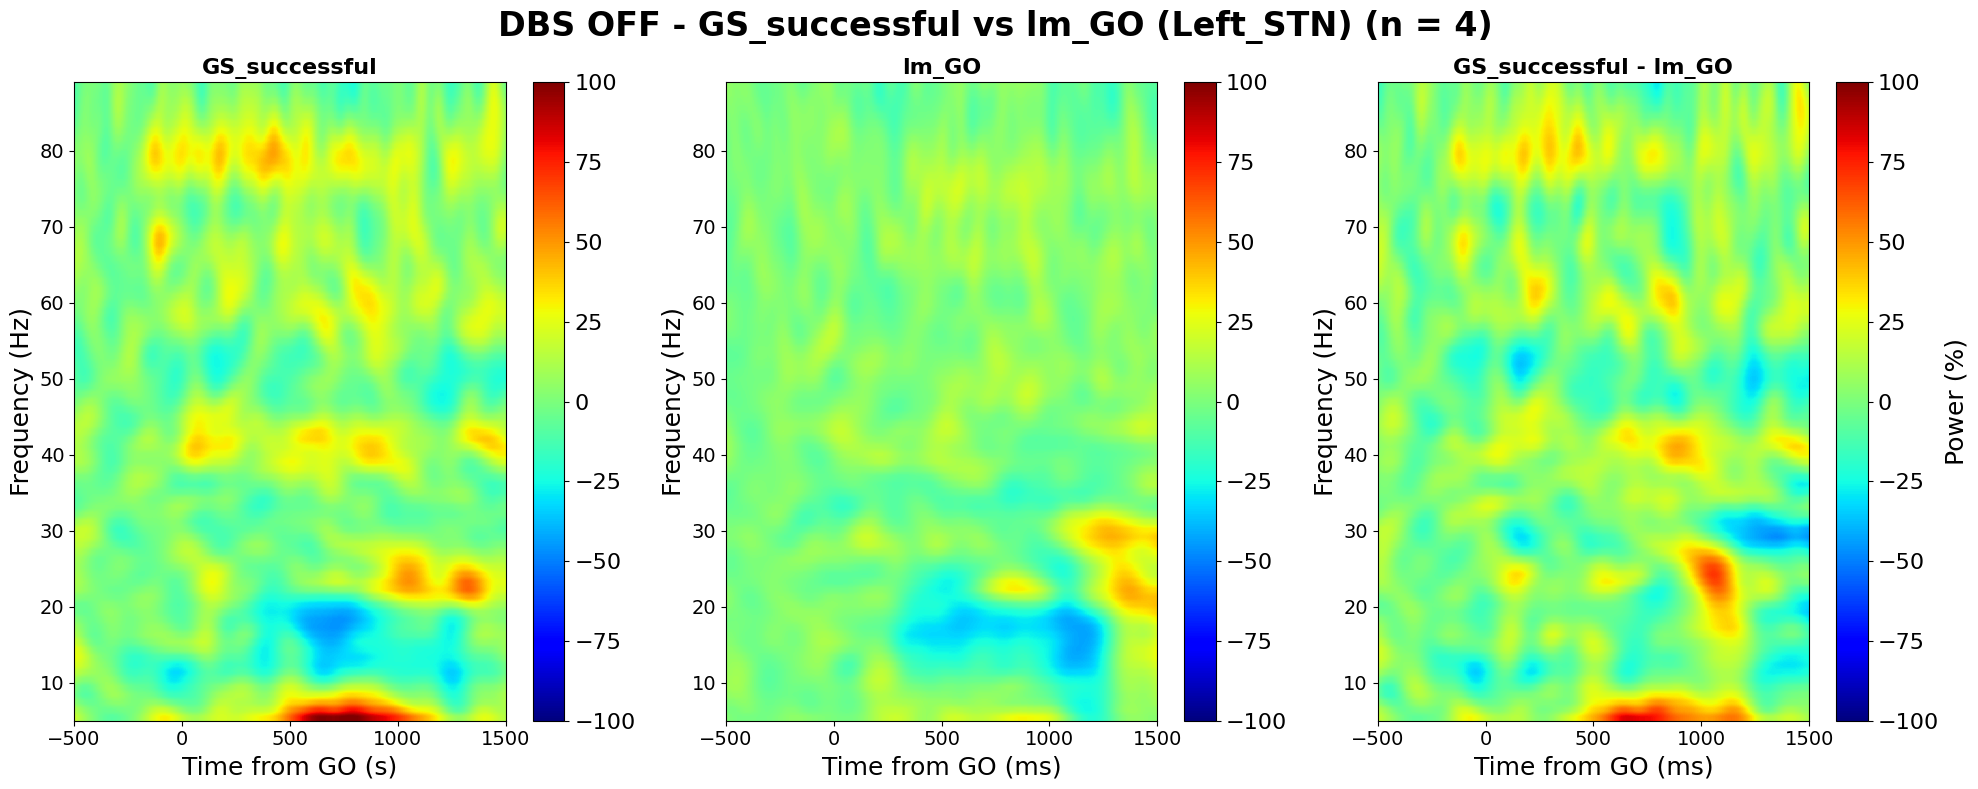

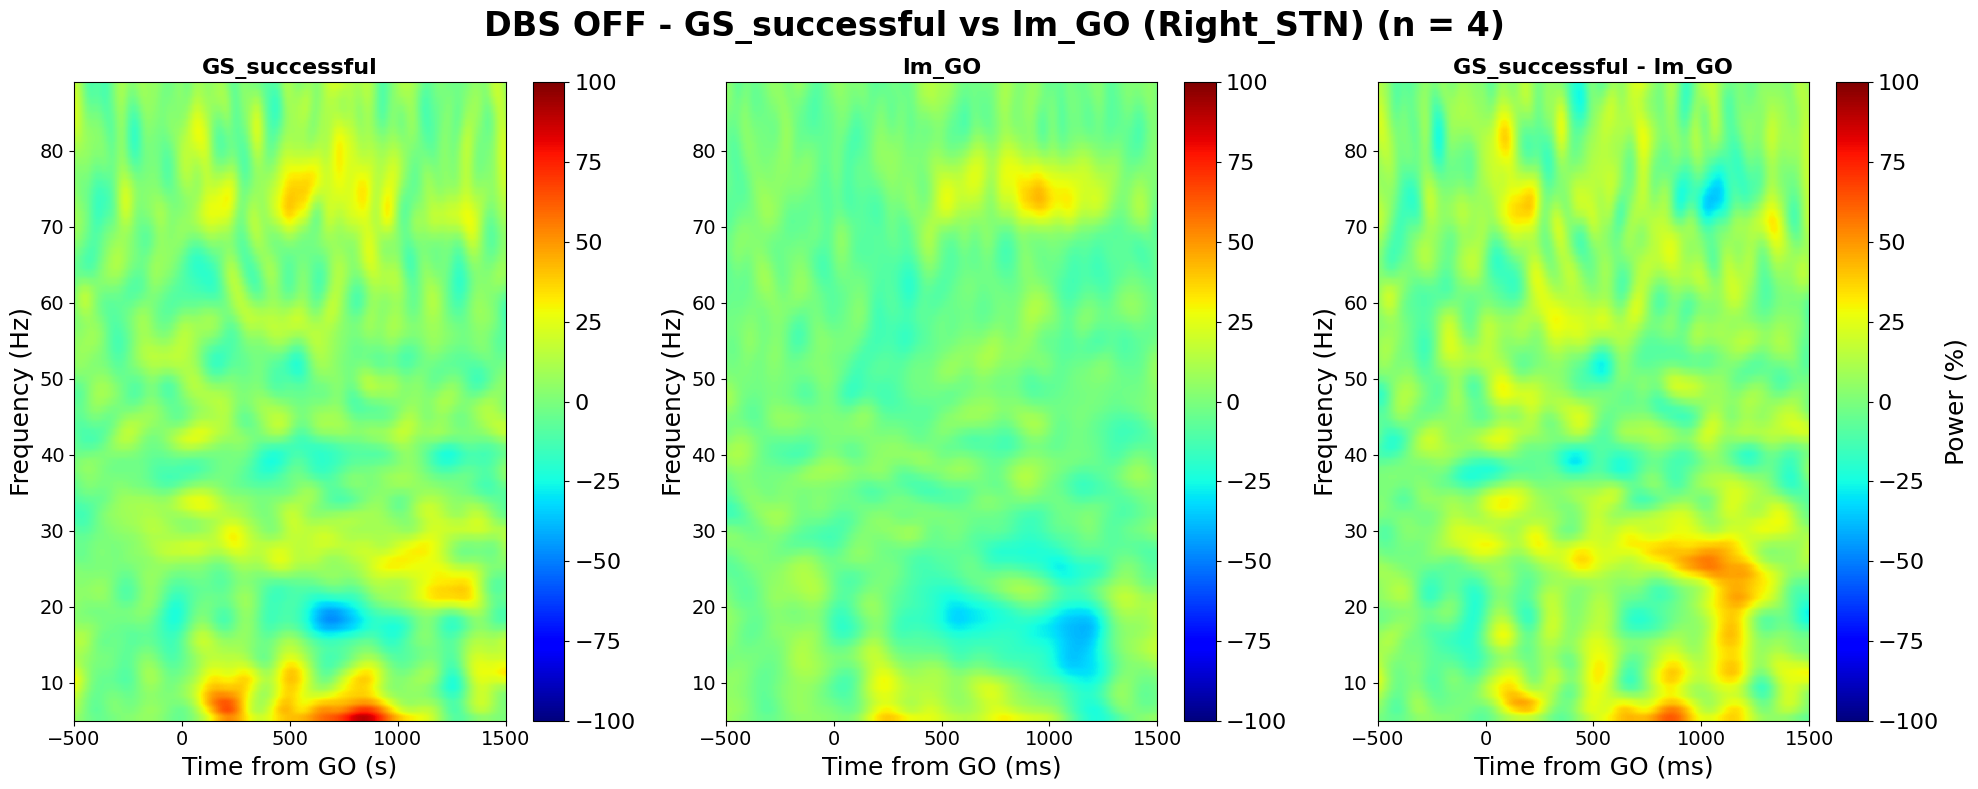

In [57]:
plot_power_comparison_between_2_conditions(
["Left_STN", "Right_STN"], epochs_by_condition, "DBS OFF", "GS_successful", 
    "lm_GO", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )


(6, 85, 201)
stat_fun(H1): min=-8.400973315037236 max=6.2656016477148935
Running initial clustering …
Found 85 clusters


  0%|          | Permuting (exact test) : 0/31 [00:00<?,       ?it/s]

p_values: [1.     0.9375 1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     1.     1.    ]
P_values shape: (85,)
T_obs shape: (85, 201)
(6, 85, 201)
stat_fun(H1): min=-12.40191278873995 max=7.170631075941788
Running initial clustering …
Found 80 clusters


  0%|          | Permuting (exact test) : 0/31 [00:00<?,       ?it/s]

p_values: [1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      0.40625 1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      0.96875 1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.     ]
P_values shape: (80,)
T_obs shape: (85, 201)
Skipping invalid cluster index: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


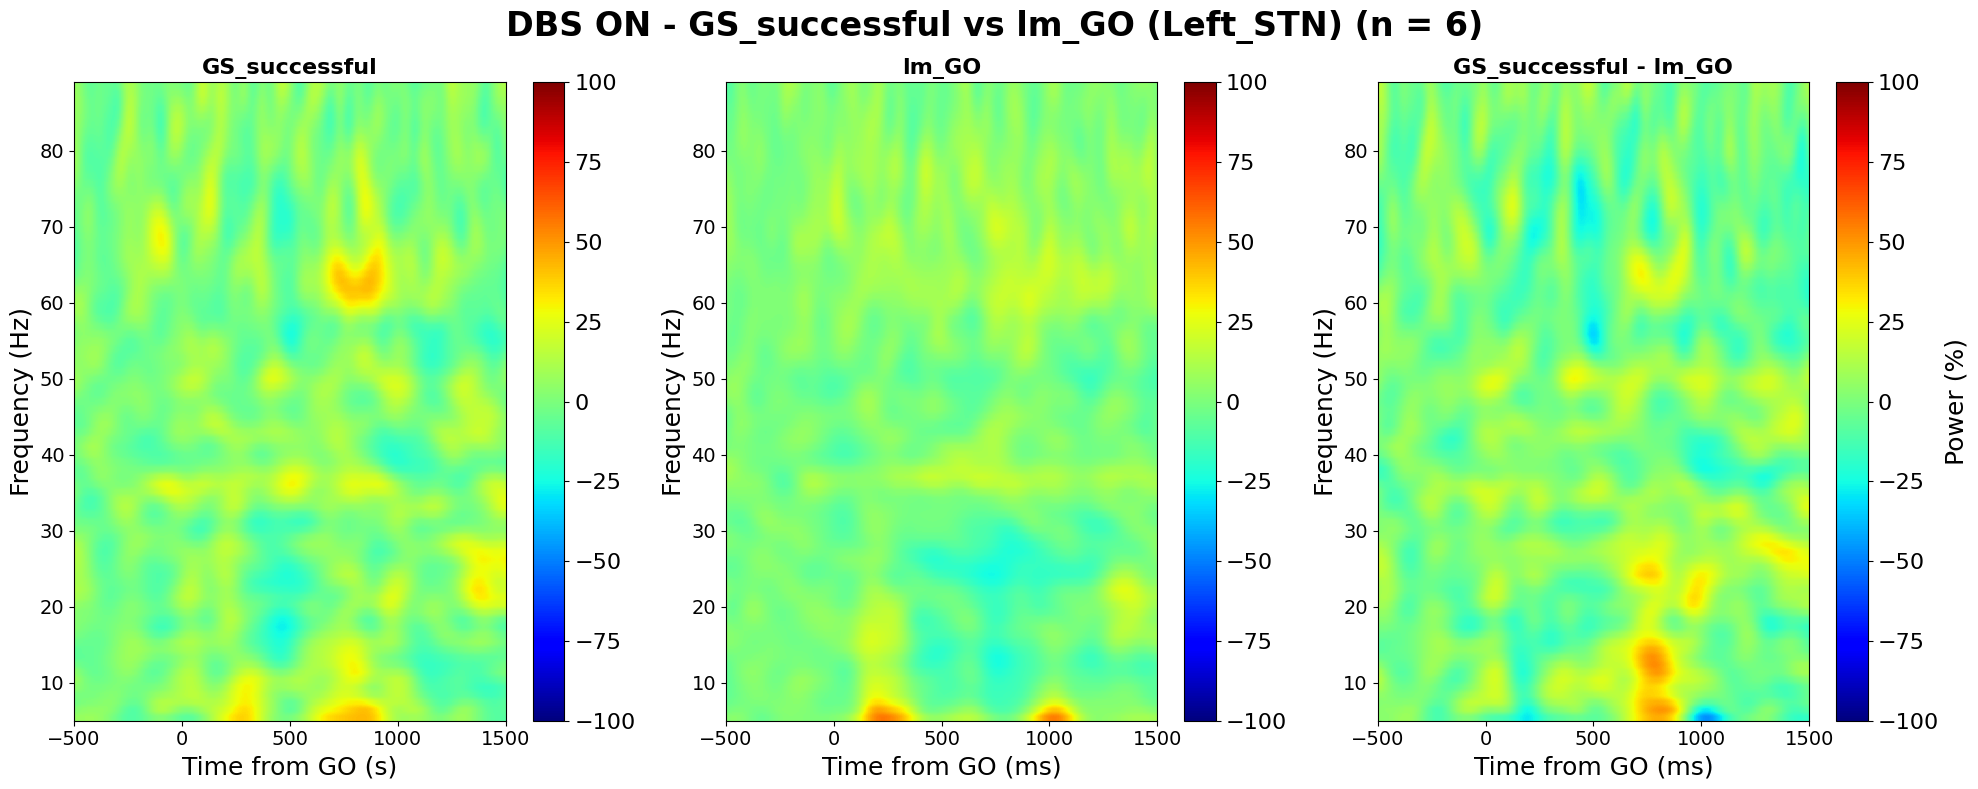

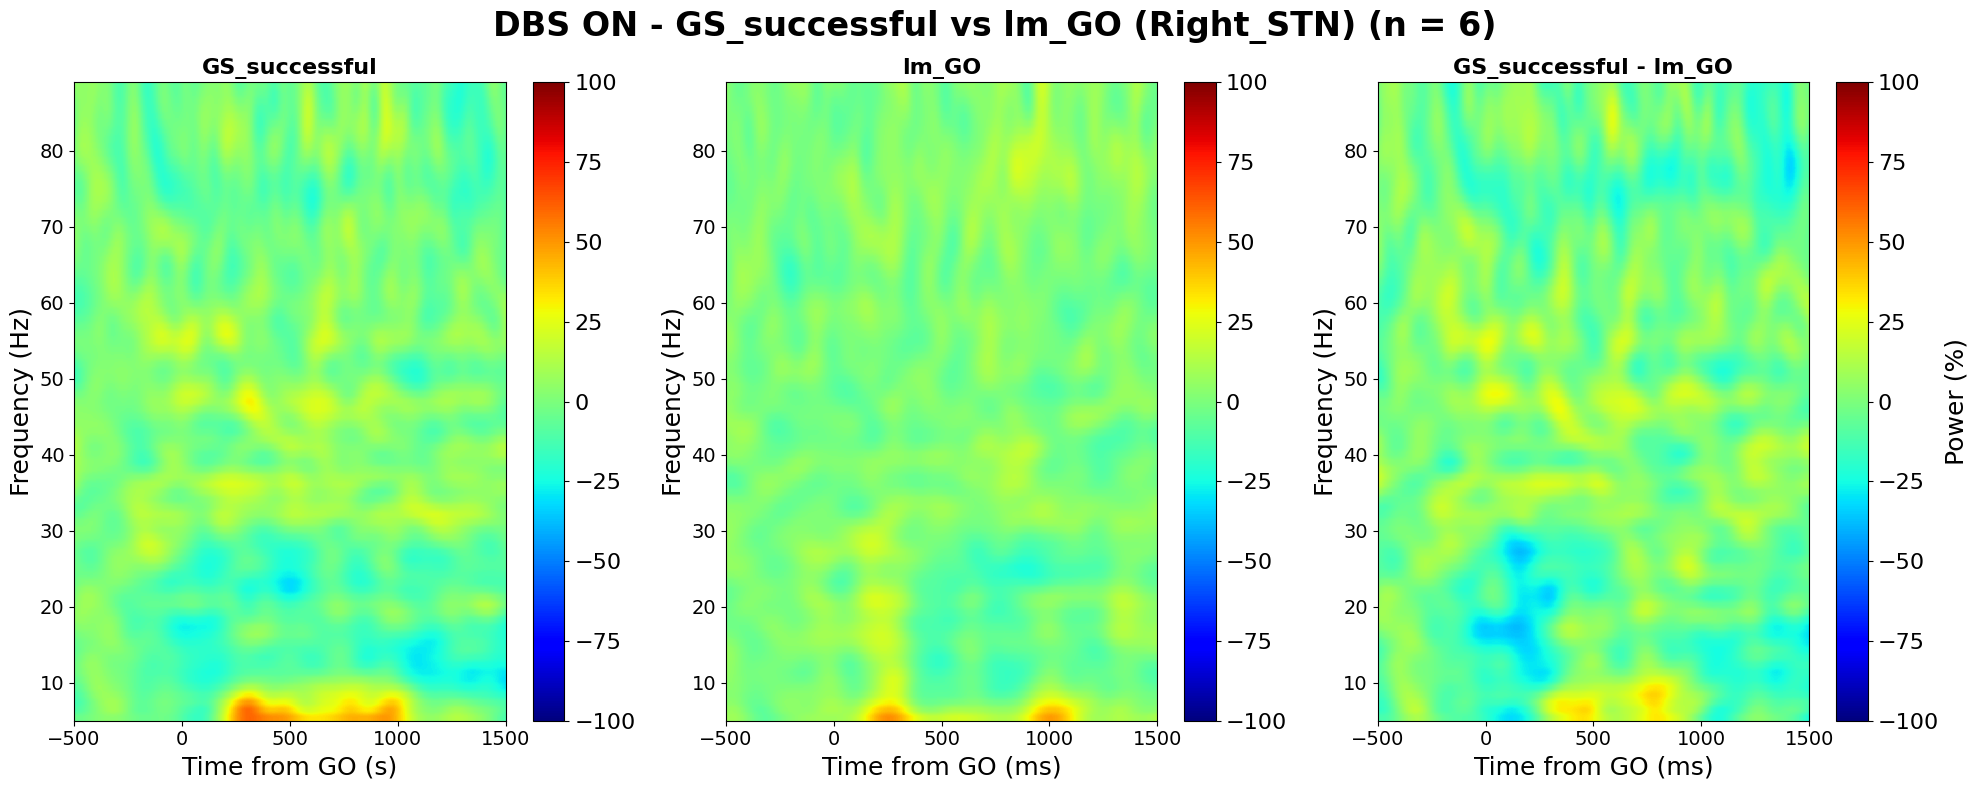

In [55]:
plot_power_comparison_between_2_conditions(
["Left_STN", "Right_STN"], epochs_by_condition, "DBS ON", "GS_successful", 
    "lm_GO", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

(4, 85, 201)
stat_fun(H1): min=-14.247926613911481 max=21.252939322499376
Running initial clustering …
Found 88 clusters


  0%|          | Permuting (exact test) : 0/7 [00:00<?,       ?it/s]

p_values: [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    0.625 1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 0.5   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    0.625 1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.   ]
P_values shape: (88,)
T_obs shape: (85, 201)
(4, 85, 201)
stat_fun(H1): min=-26.917880302902404 max=17.314043964392017
Running initial clustering …
Found 77 clusters


  0%|          | Permuting (exact test) : 0/7 [00:00<?,       ?it/s]

p_values: [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.75 1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.  ]
P_values shape: (77,)
T_obs shape: (85, 201)


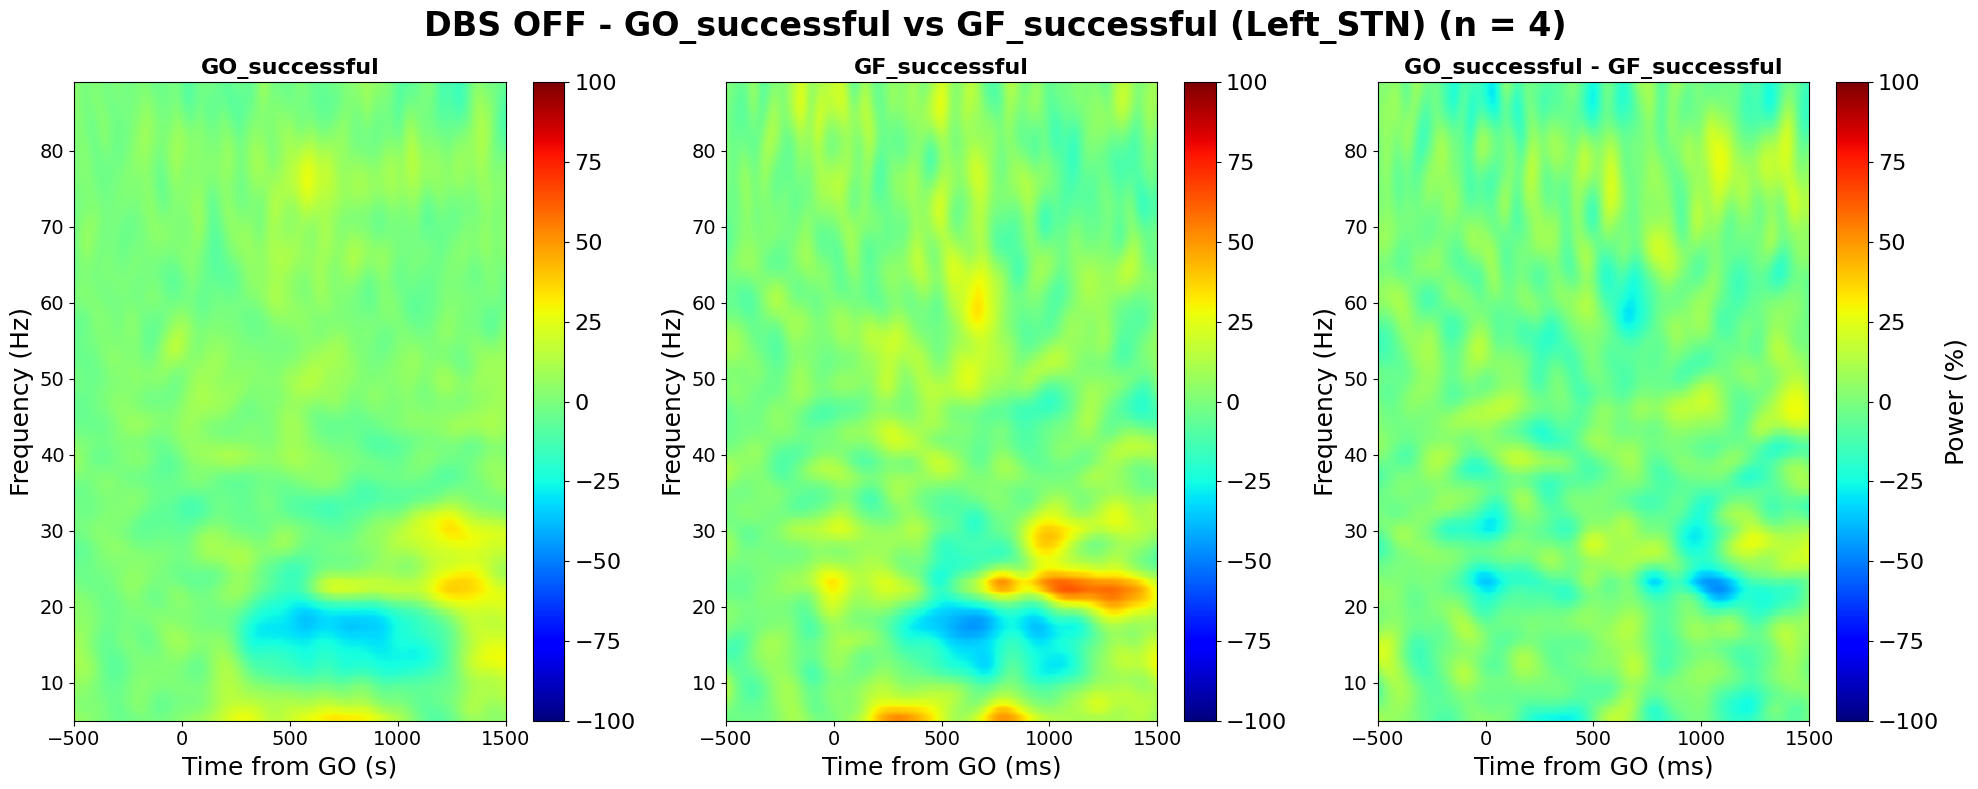

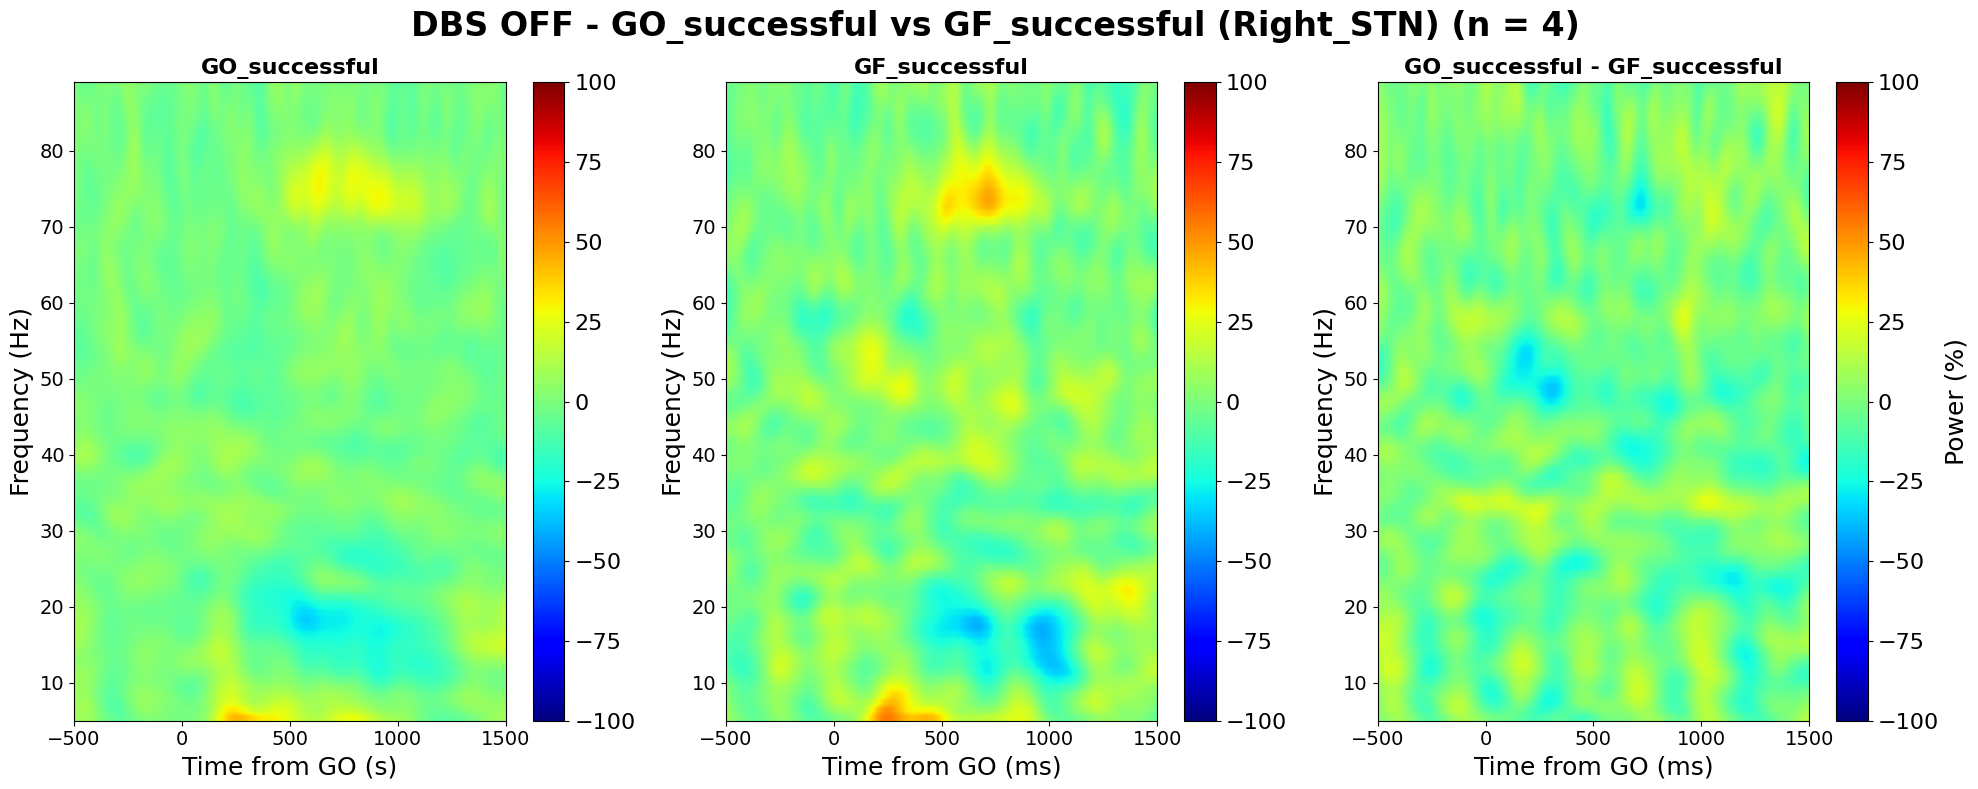

In [44]:
plot_power_comparison_between_2_conditions(
["Left_STN", "Right_STN"], epochs_by_condition, "DBS OFF", "GO_successful", 
    "GF_successful", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

(6, 85, 201)
stat_fun(H1): min=-7.964360574772347 max=7.525670602807834
Running initial clustering …
Found 50 clusters


  0%|          | Permuting (exact test) : 0/31 [00:00<?,       ?it/s]

p_values: [1.      1.      1.      0.96875 1.      1.      1.      1.      1.
 1.      0.96875 0.46875 1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      0.9375
 1.      1.      1.      0.96875 0.96875 1.      1.      1.      0.53125
 1.      1.      1.      1.      1.      1.      1.      1.      0.96875
 1.      1.      1.      1.      1.     ]
P_values shape: (50,)
T_obs shape: (85, 201)
(6, 85, 201)
stat_fun(H1): min=-15.871560765859646 max=7.14655978385259
Running initial clustering …
Found 50 clusters


  0%|          | Permuting (exact test) : 0/31 [00:00<?,       ?it/s]

p_values: [1.      0.96875 1.      1.      1.      1.      1.      0.84375 1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 0.96875 1.      1.      0.65625 1.      0.96875 1.      1.      1.
 1.      1.      1.      1.      1.     ]
P_values shape: (50,)
T_obs shape: (85, 201)


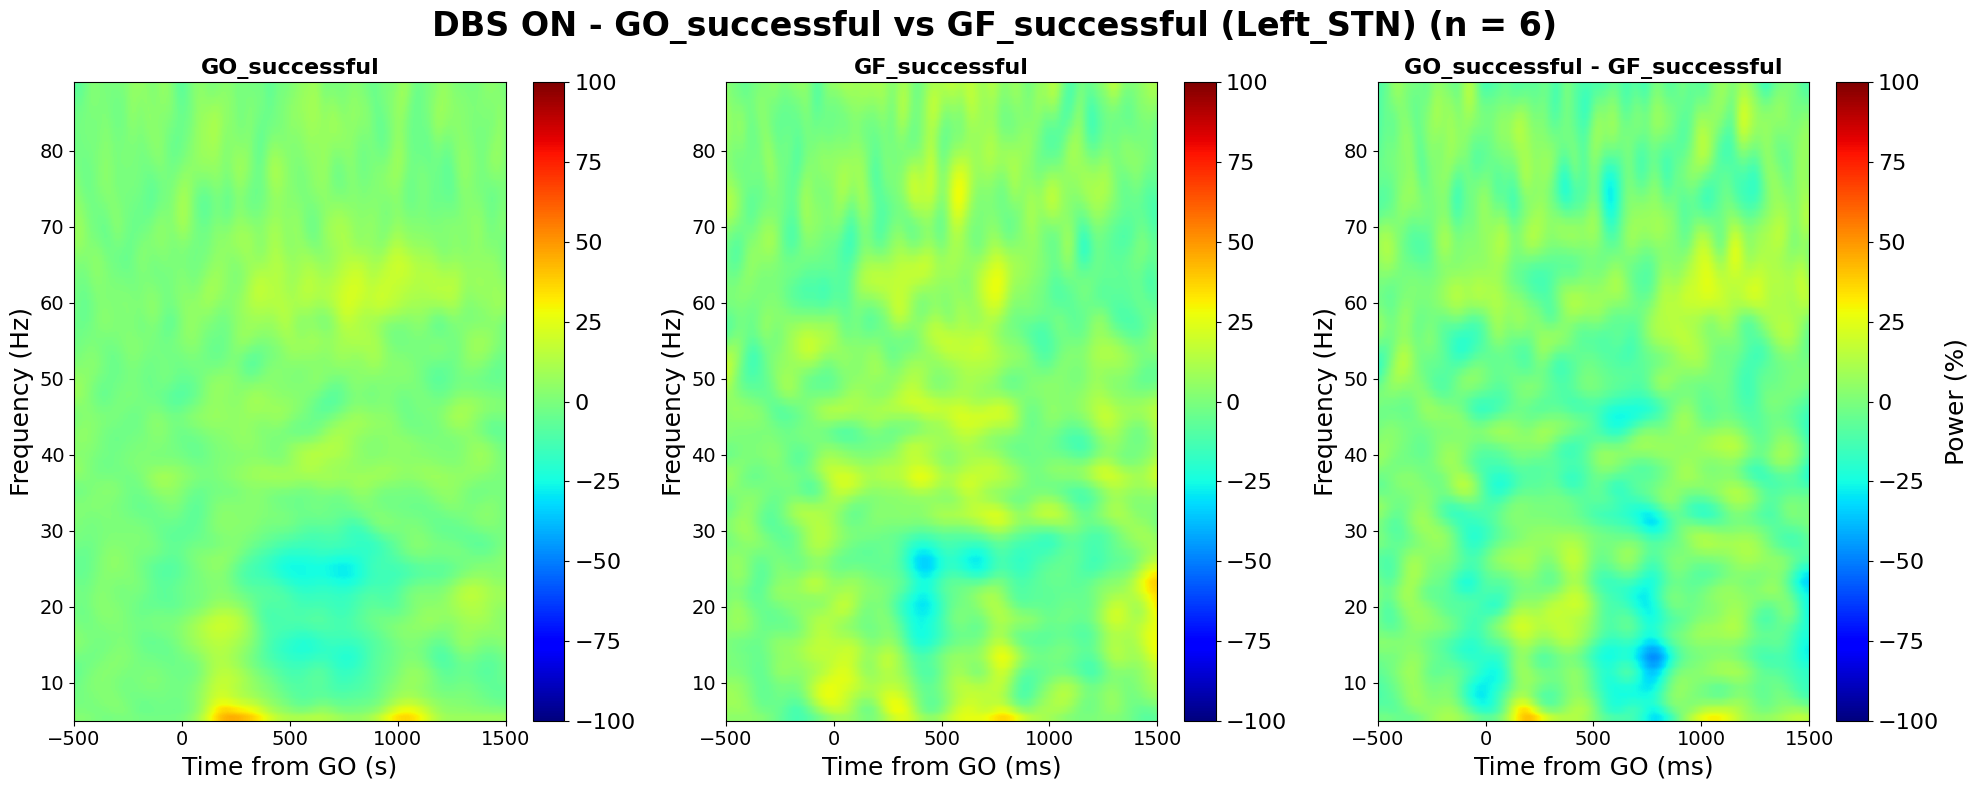

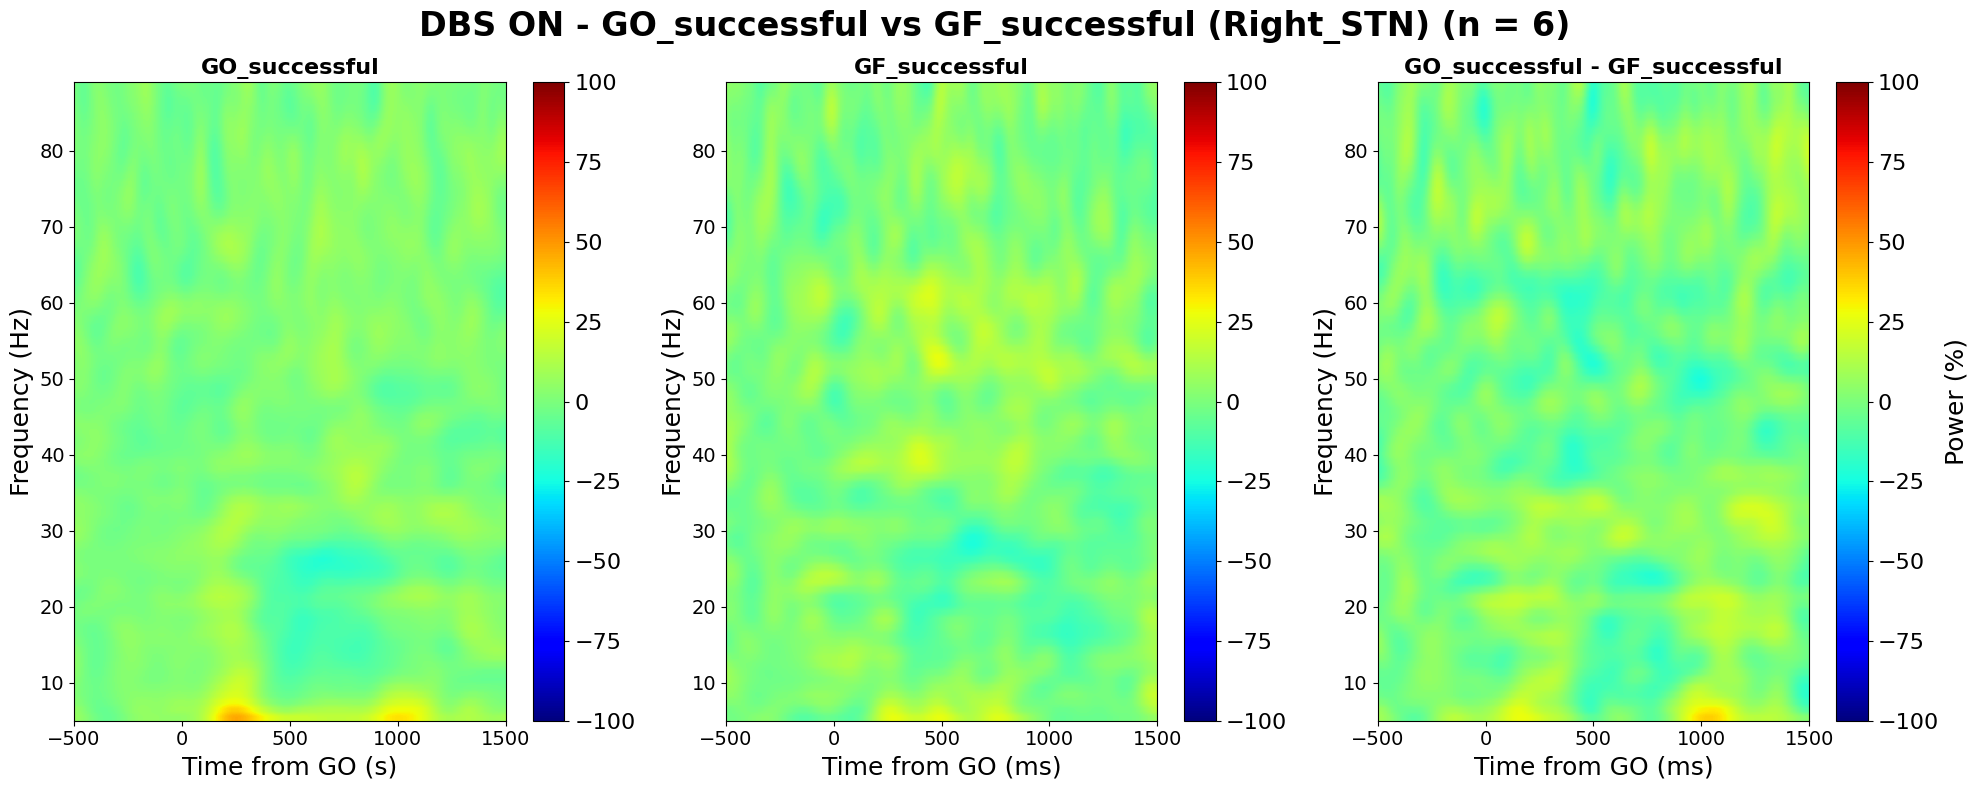

In [45]:
plot_power_comparison_between_2_conditions(
["Left_STN", "Right_STN"], epochs_by_condition, "DBS ON", "GO_successful", 
    "GF_successful", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

(4, 85, 201)
stat_fun(H1): min=-35.494991833291955 max=27.54688272099989
Running initial clustering …
Found 70 clusters


  0%|          | Permuting (exact test) : 0/7 [00:00<?,       ?it/s]

p_values: [1.    1.    0.875 1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.875 1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    0.875 1.    0.375 1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.375 1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
P_values shape: (70,)
T_obs shape: (85, 201)
(4, 85, 201)
stat_fun(H1): min=-22.4866479787279 max=28.573895444786405
Running initial clustering …
Found 73 clusters


  0%|          | Permuting (exact test) : 0/7 [00:00<?,       ?it/s]

p_values: [1.    0.125 1.    1.    1.    1.    1.    0.375 1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.   ]
P_values shape: (73,)
T_obs shape: (85, 201)


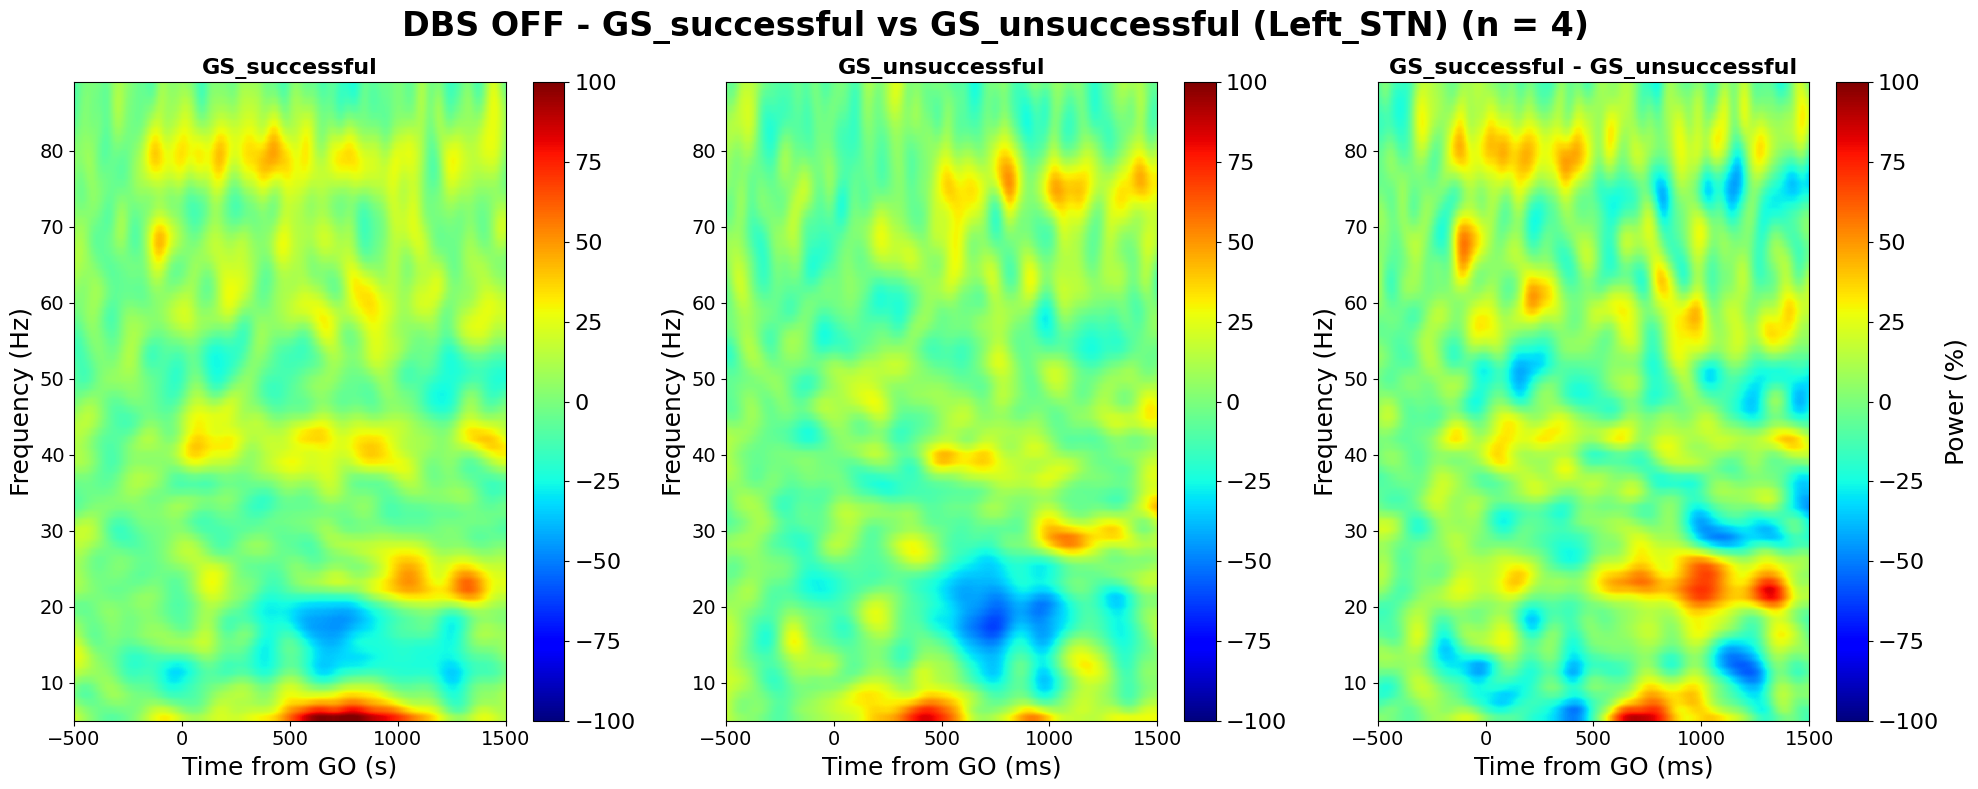

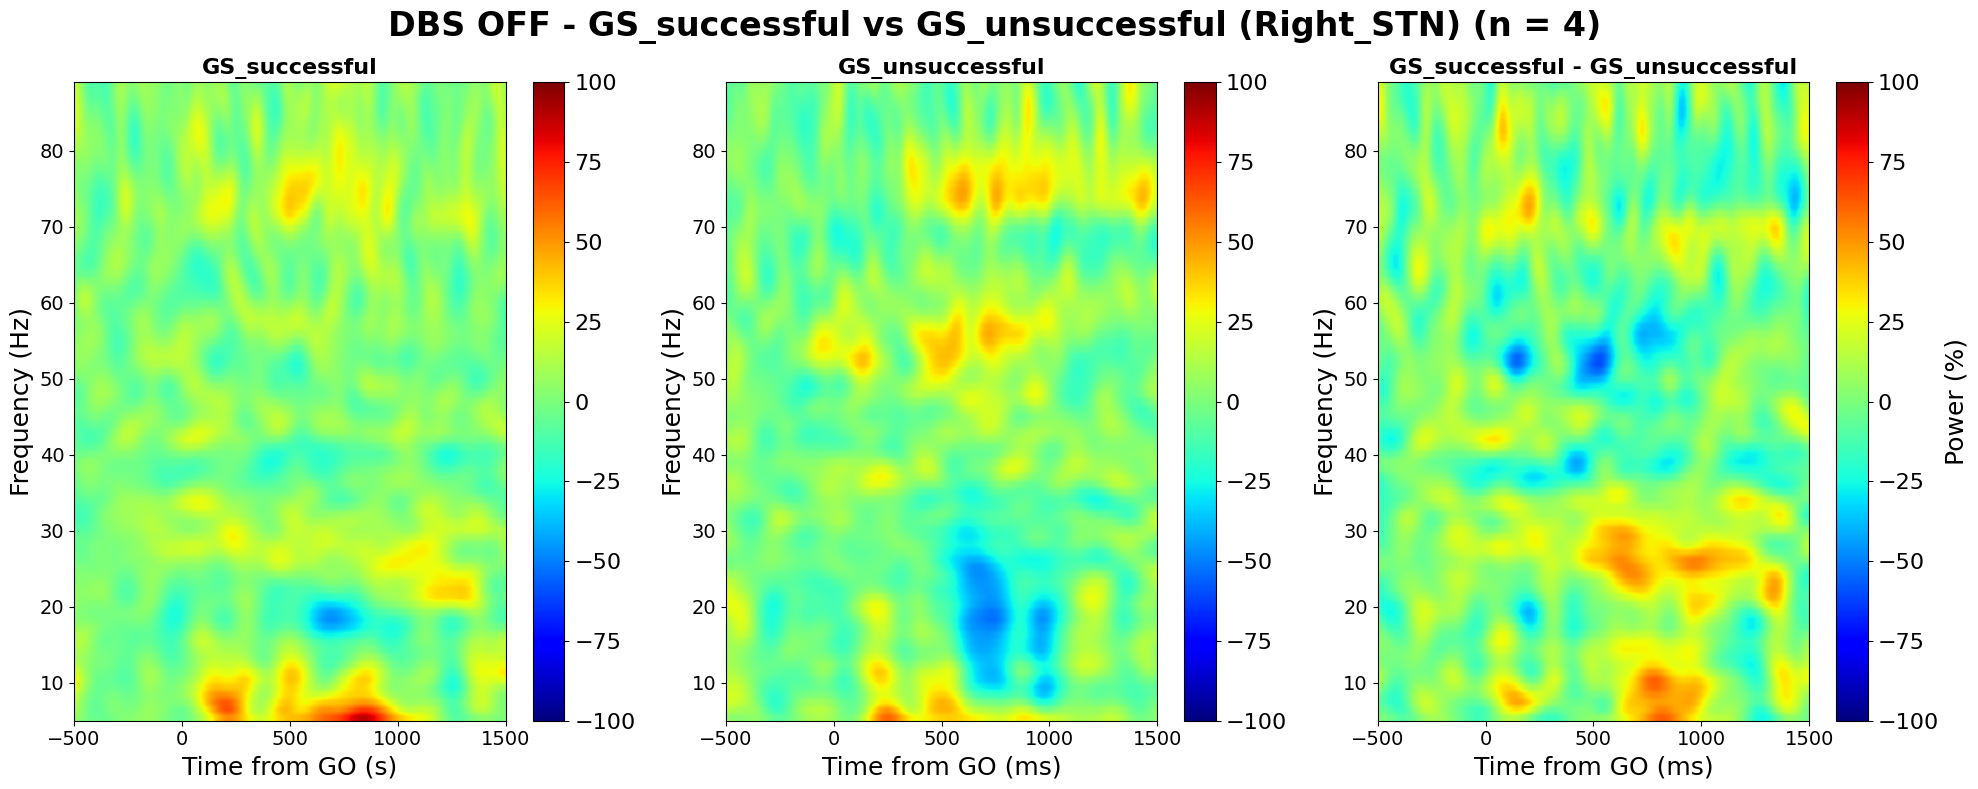

In [46]:
plot_power_comparison_between_2_conditions(
["Left_STN", "Right_STN"], epochs_by_condition, "DBS OFF", "GS_successful", 
    "GS_unsuccessful", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

(6, 85, 201)
stat_fun(H1): min=-9.713395793787038 max=14.055333289520409
Running initial clustering …
Found 50 clusters


  0%|          | Permuting (exact test) : 0/31 [00:00<?,       ?it/s]

p_values: [1.      1.      1.      1.      1.      1.      0.8125  1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      0.5625  1.      1.      1.      0.90625 1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.     ]
P_values shape: (50,)
T_obs shape: (85, 201)
(6, 85, 201)
stat_fun(H1): min=-8.580834014211169 max=8.16215026284411
Running initial clustering …
Found 70 clusters


  0%|          | Permuting (exact test) : 0/31 [00:00<?,       ?it/s]

p_values: [0.3125  0.0625  1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      0.71875 1.      1.      0.90625 1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      0.125   0.96875 1.
 1.      1.      0.96875 0.6875  1.      1.      1.      1.      1.
 1.      0.8125  1.      1.      1.      1.      1.     ]
P_values shape: (70,)
T_obs shape: (85, 201)


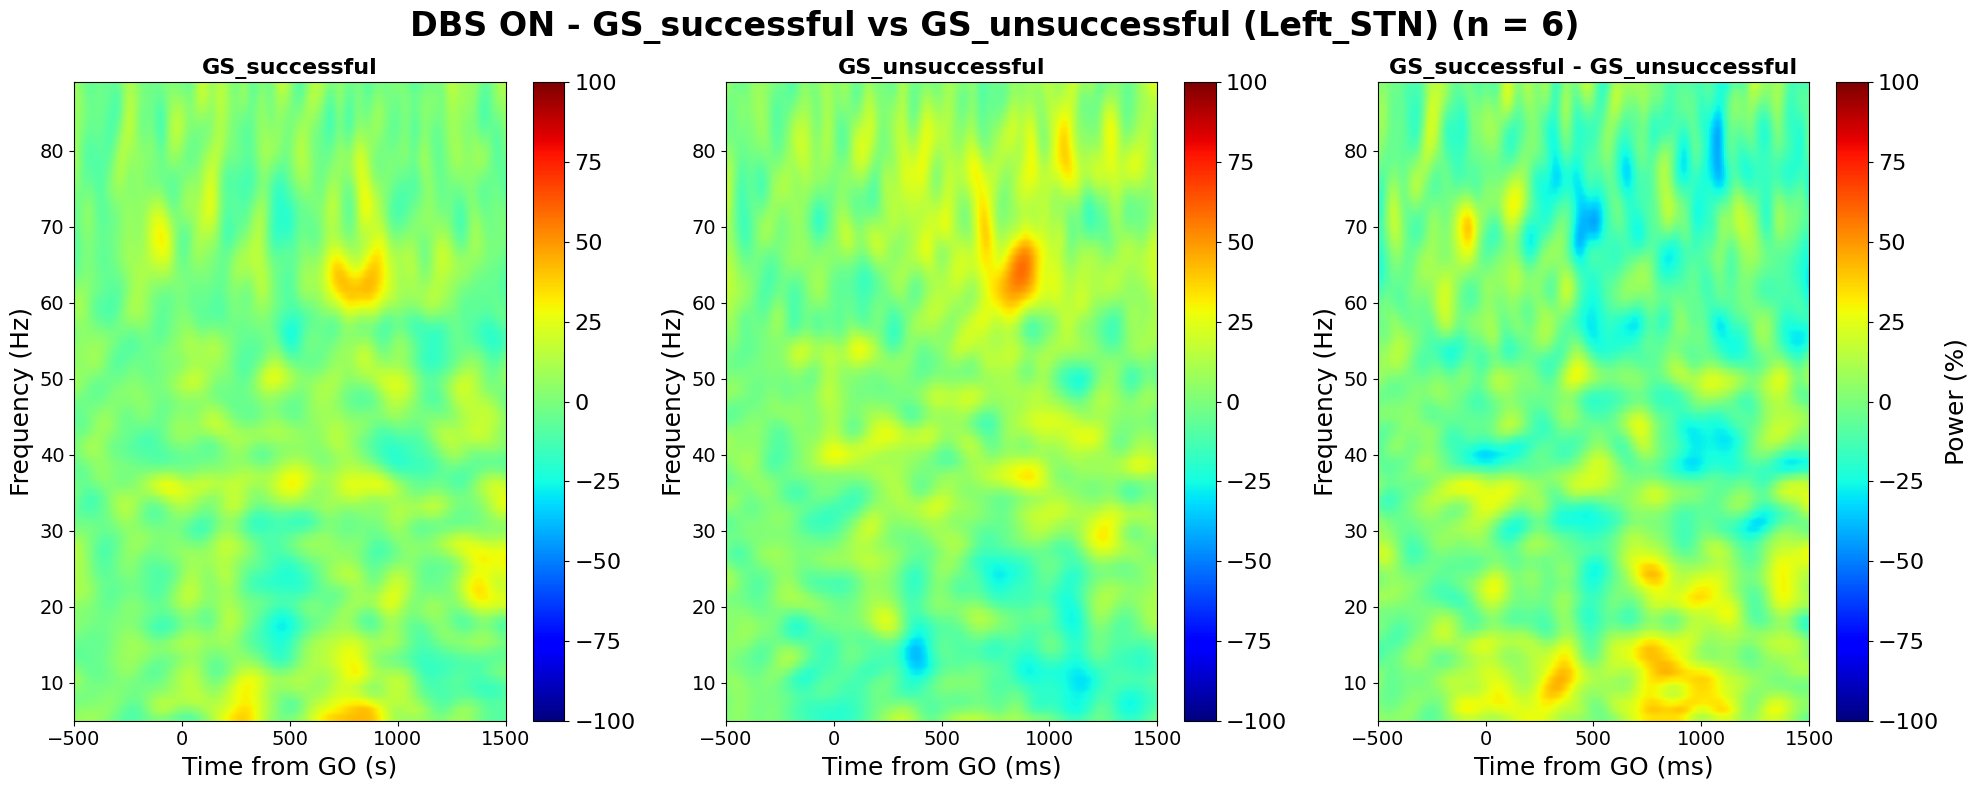

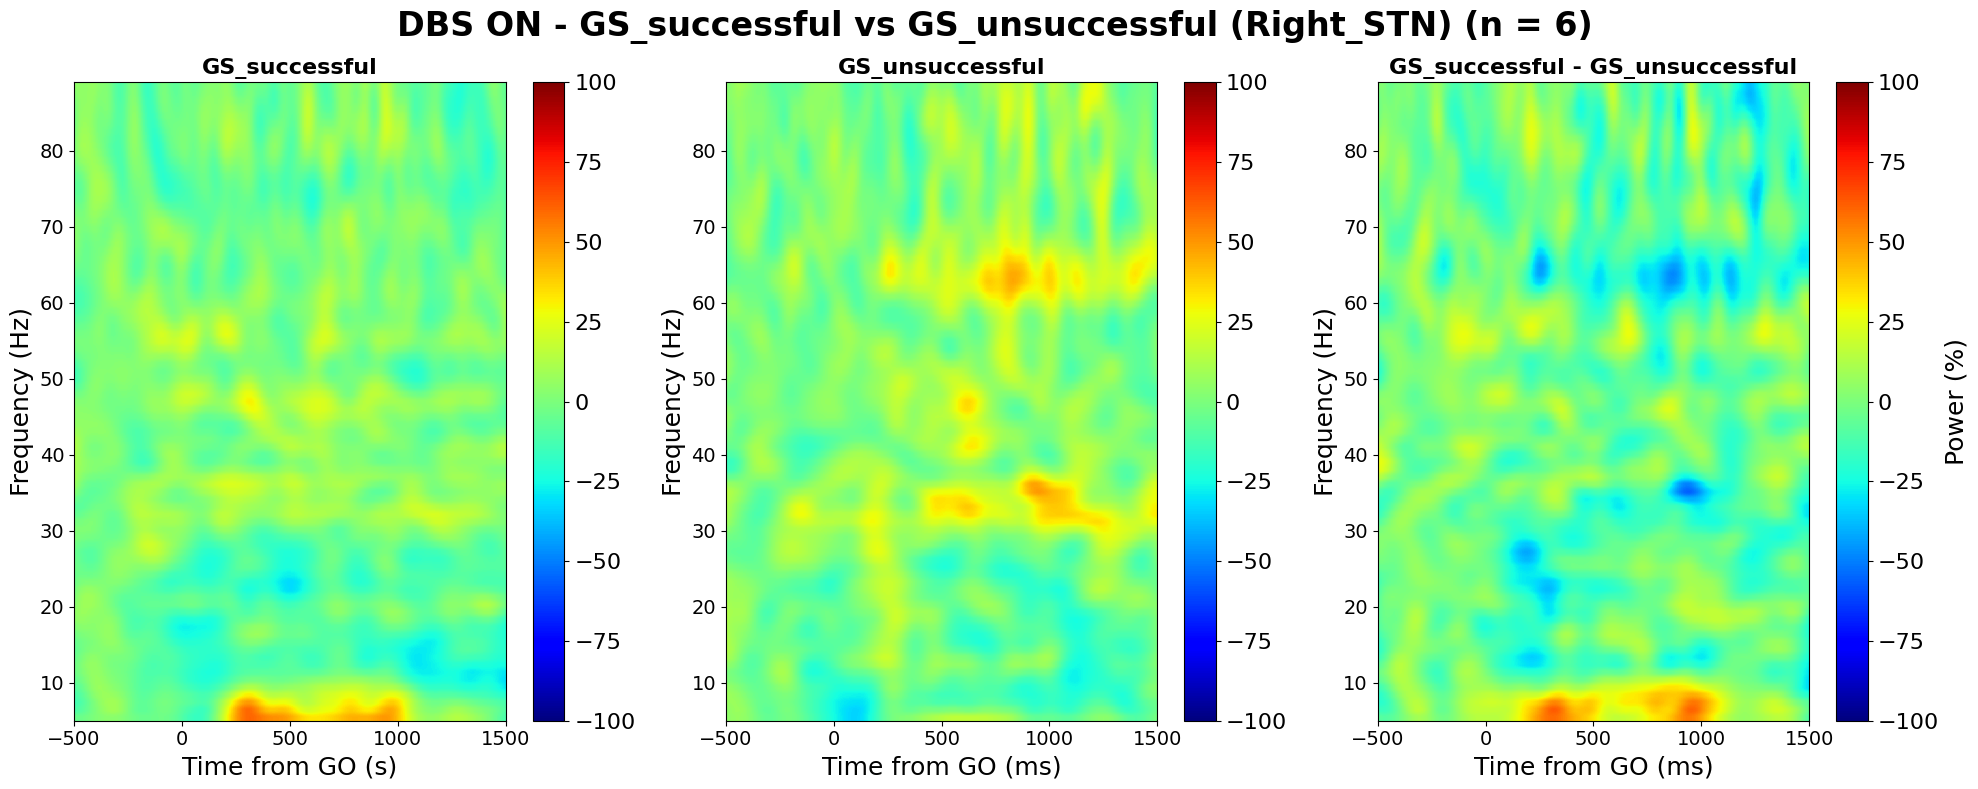

In [47]:
plot_power_comparison_between_2_conditions(
["Left_STN", "Right_STN"], epochs_by_condition, "DBS ON", "GS_successful", 
    "GS_unsuccessful", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

In [48]:
def plot_power_comparison_between_2_conditions_all_ch(
        ch_names: list,
        epochs_by_condition,
        condition: str, # "DBS ON" or "DBS OFF"
        condition1_name: str, 
        condition2_name: str,
        channel_n: list, 
        centered_around: str, 
        saving_path: str,
        fmax: int = 50,
        vmin = None,
        vmax = None
        ):
    """
    This function plots the power comparison between two conditions for specific channels of interest.

    session_ID: session ID
    raw: raw data (loaded through mne.io.read_raw)
    condition1_epochs: mne.Epochs object for condition 1
    condition1_name: name of condition 1
    mean_RT_condition1: mean reaction time for condition 1 (in milliseconds)
    condition2_epochs: mne.Epochs object for condition 2
    condition2_name: name of condition 2
    mean_RT_condition2: mean reaction time for condition 2 (in milliseconds)
    channel_n: list of channel indices to plot
    centered_around: event to center the plot around (e.g. 'GO signal')
    saving_path: path to save the figure
    """

    # parameters for tfr computation
    freqs = np.arange(5, fmax, 1)  # define frequencies of interest
    tfr_kwargs = dict(
        method="morlet",
        freqs=freqs,
        n_cycles=np.clip(freqs / 2, 3, 10),
        #n_cycles = 7, # Ensure n_cycles is between 3 and 20
        decim=2,
        return_itc=False,
        average=False,
    )
    baseline = (-0.5, -0.2)

    # Initialize lists to store power data across channels
    avg_power_1_all_chs = []
    avg_power_2_all_chs = []
    diff_list = []

    for ch in channel_n:
        ch_name = ch_names[ch]

        avg_power_1, all_power_1, times = compute_percent_change(epochs_by_condition, condition, condition1_name, ch, baseline, **tfr_kwargs)
        avg_power_2, all_power_2, times = compute_percent_change(epochs_by_condition, condition, condition2_name, ch, baseline, **tfr_kwargs)
        
        avg_power_1_all_chs.append(avg_power_1)
        avg_power_2_all_chs.append(avg_power_2)

        # Assuming all_power_1 and all_power_2 are your dictionaries
        common_subjects = list(set(all_power_1.keys()).intersection(set(all_power_2.keys())))

        # Iterate through the common subjects and subtract
        for subject in common_subjects:
            power_1 = all_power_1[subject]  # Get power for condition 1
            power_2 = all_power_2[subject]  # Get power for condition 2
            diff = power_1 - power_2  # Subtract condition 2 from condition 1
            diff_list.append(diff)

    # Convert the list of differences to a numpy array
    diff_array = np.array(diff_list)
    n_obs = diff_array.shape[0]

    # Average across channels for both conditions
    avg_power_1_all_chs = np.mean(np.array(avg_power_1_all_chs), axis=0)
    avg_power_2_all_chs = np.mean(np.array(avg_power_2_all_chs), axis=0)

    # Create figure with 3 subplots
    fig, (ax1, ax2, ax_diff) = plt.subplots(1, 3, figsize=(20, 8))

    # Plot average power for condition 1
    if vmin:
        im1 = ax1.imshow(avg_power_1_all_chs, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                         aspect="auto", origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
    else:
        im1 = ax1.imshow(avg_power_1_all_chs, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                         aspect="auto", origin="lower", cmap="jet")             
    ax1.set_title(f"{condition1_name} (Avg. across channels)", size=16, fontweight="bold")
    ax1.set_xlabel("Time from GO (s)", size=18)
    ax1.set_ylabel("Frequency (Hz)", size=18)
    ax1.tick_params(axis="x", labelsize=14)
    ax1.tick_params(axis="y", labelsize=14)
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.ax.tick_params(labelsize=16)

    # Plot average power for condition 2
    if vmin:
        im2 = ax2.imshow(avg_power_2_all_chs, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                         aspect="auto", origin="lower", cmap="jet", vmin=vmin, vmax=vmax)
    else:
        im2 = ax2.imshow(avg_power_2_all_chs, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                         aspect="auto", origin="lower", cmap="jet")
    ax2.set_title(f"{condition2_name} (Avg. across channels)", size=16, fontweight="bold")
    ax2.set_xlabel("Time from GO (ms)", size=18)
    ax2.set_ylabel("Frequency (Hz)", size=18)
    ax2.tick_params(axis="x", labelsize=14)
    ax2.tick_params(axis="y", labelsize=14)
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.ax.tick_params(labelsize=16)

    # Compute permutation cluster test
    pval = 0.05
    n_permutations = 1000
    T_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(
        diff_array, n_permutations=n_permutations, threshold=None, tail=0,
        out_type="mask", seed=11111, verbose=True)

    # Plot the cluster-corrected power contrast (third plot)
    diff_avg = np.mean(diff_array, axis=0)
    im_diff = ax_diff.imshow(diff_avg, extent=[times[0], times[-1], freqs[0], freqs[-1]],
                             aspect="auto", origin="lower", cmap="jet", vmin=-100, vmax=100)
    
    for c, p_val in zip(clusters, cluster_p_values):
        if p_val <= pval:
            mask = np.zeros(T_obs.shape, dtype=bool)
            if isinstance(c, tuple):
                mask[c] = True
            if mask.any():
                ax_diff.contour(mask, levels=[0.5], colors='black', linewidths=1.5,
                                extent=[times[0], times[-1], freqs[0], freqs[-1]])
            
    ax_diff.set_title(f"{condition1_name} - {condition2_name} (Avg. across channels)", size=16, fontweight="bold")
    ax_diff.set_xlabel("Time from GO (ms)", size=18)
    ax_diff.set_ylabel("Frequency (Hz)", size=18)
    ax_diff.tick_params(axis="x", labelsize=14)
    ax_diff.tick_params(axis="y", labelsize=14)
    cbar_diff = fig.colorbar(im_diff, ax=ax_diff)
    cbar_diff.ax.tick_params(labelsize=16)
    cbar_diff.set_label('Power (%)', fontsize=18)

    fig.suptitle(f"{condition} - {condition1_name} vs {condition2_name} (Avg. across channels)", size=24, fontweight="bold")
    
    plt.tight_layout()
    figtitle = (f"Power Comparison between {condition1_name} and {condition2_name} trials (Avg. across channels - {condition} - n subjects = {n_obs}).png")
    plt.savefig(join(saving_path, figtitle), transparent=False)


Using a threshold of 2.364624
stat_fun(H1): min=-9.459069323122804 max=6.951951744487505
Running initial clustering …
Found 49 clusters


  0%|          | Permuting (exact test) : 0/127 [00:00<?,       ?it/s]

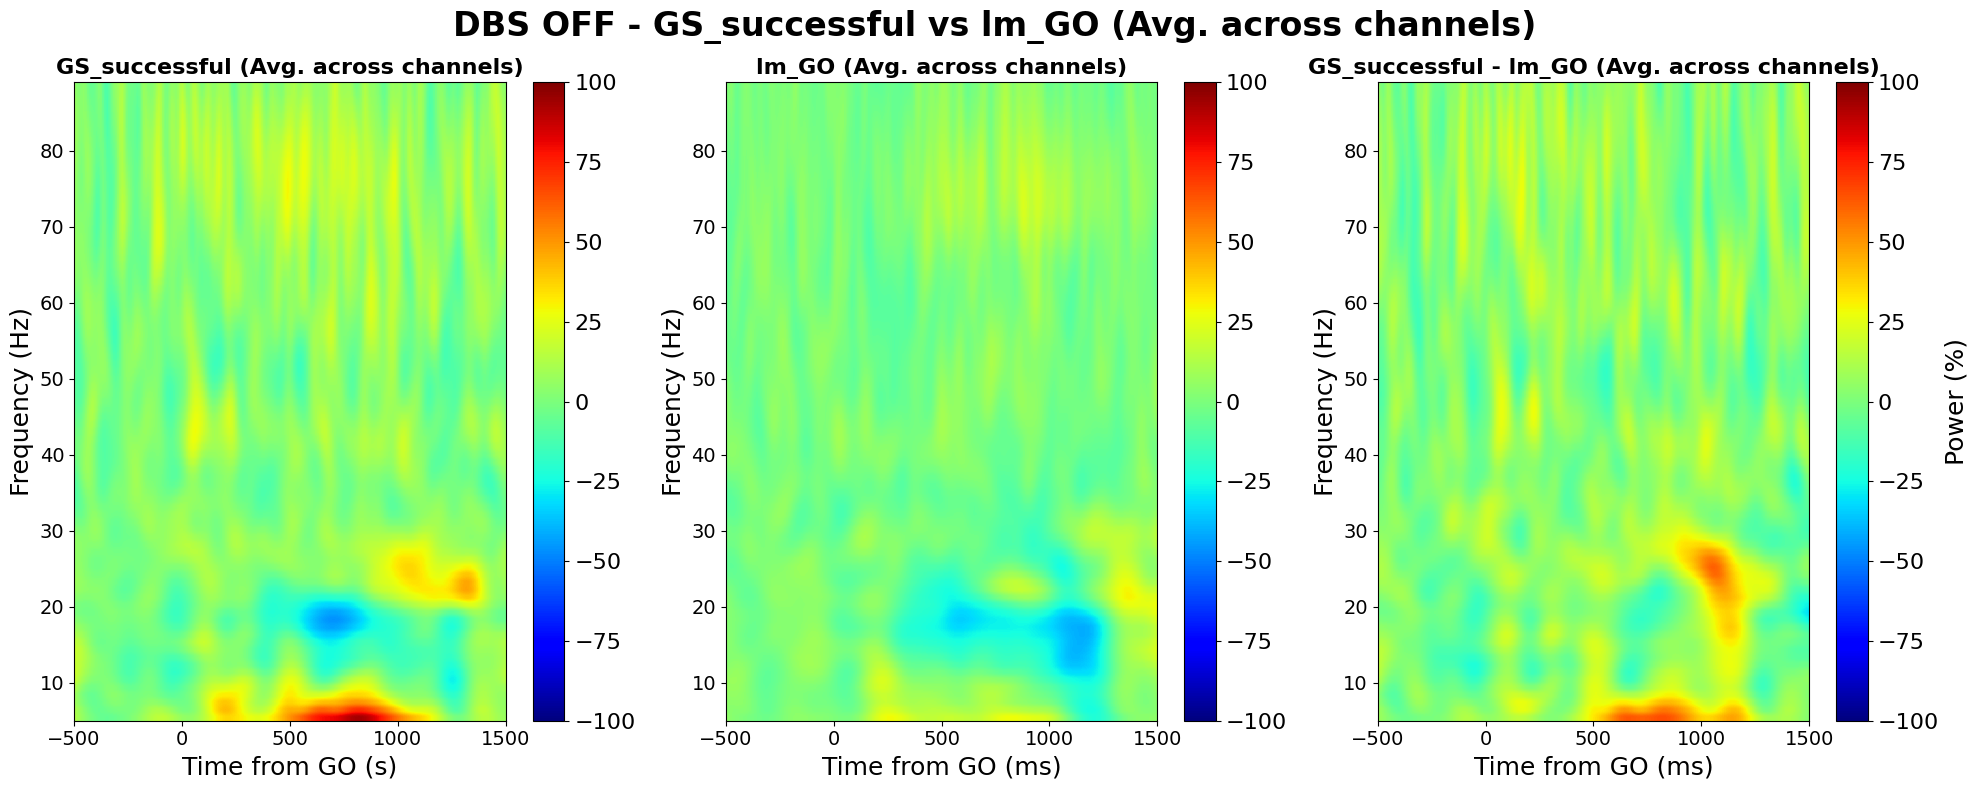

In [49]:
plot_power_comparison_between_2_conditions_all_ch(
    ["Left_STN", "Right_STN"], epochs_by_condition, "DBS OFF", "GS_successful", 
    "lm_GO", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

Using a threshold of 2.200985
stat_fun(H1): min=-4.854195428748336 max=5.035414952659422
Running initial clustering …
Found 45 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

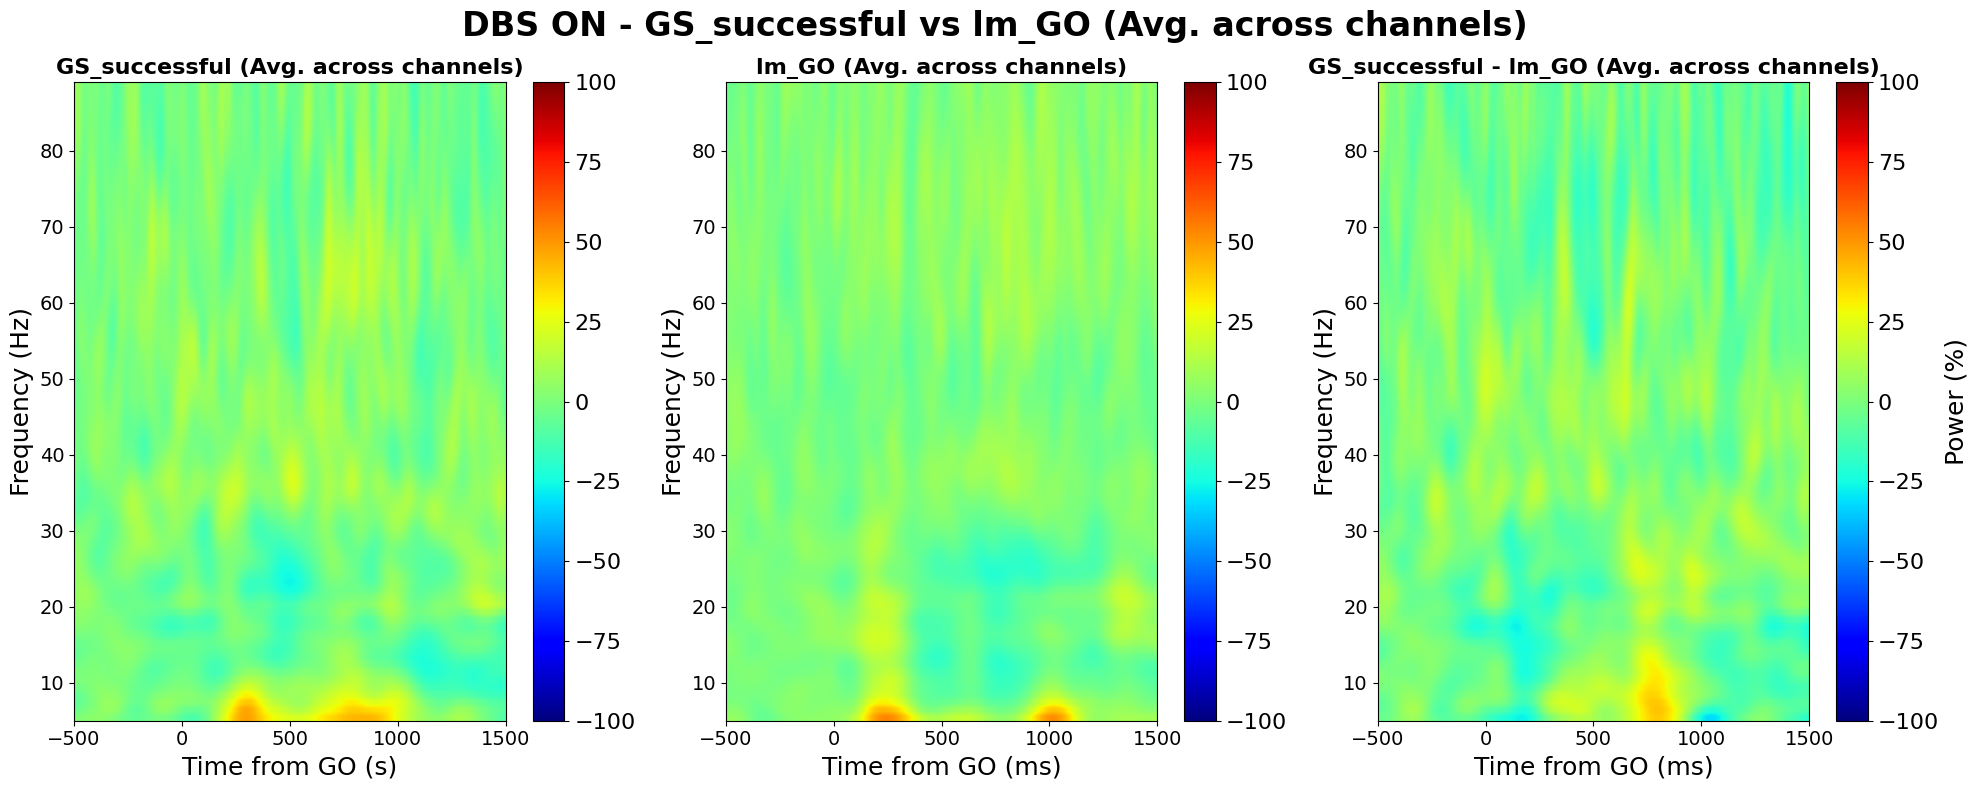

In [51]:
plot_power_comparison_between_2_conditions_all_ch(
    ["Left_STN", "Right_STN"], epochs_by_condition, "DBS ON", "GS_successful", 
    "lm_GO", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

Using a threshold of 2.364624
stat_fun(H1): min=-7.032744051641594 max=5.654027425795404
Running initial clustering …
Found 56 clusters


  0%|          | Permuting (exact test) : 0/127 [00:00<?,       ?it/s]

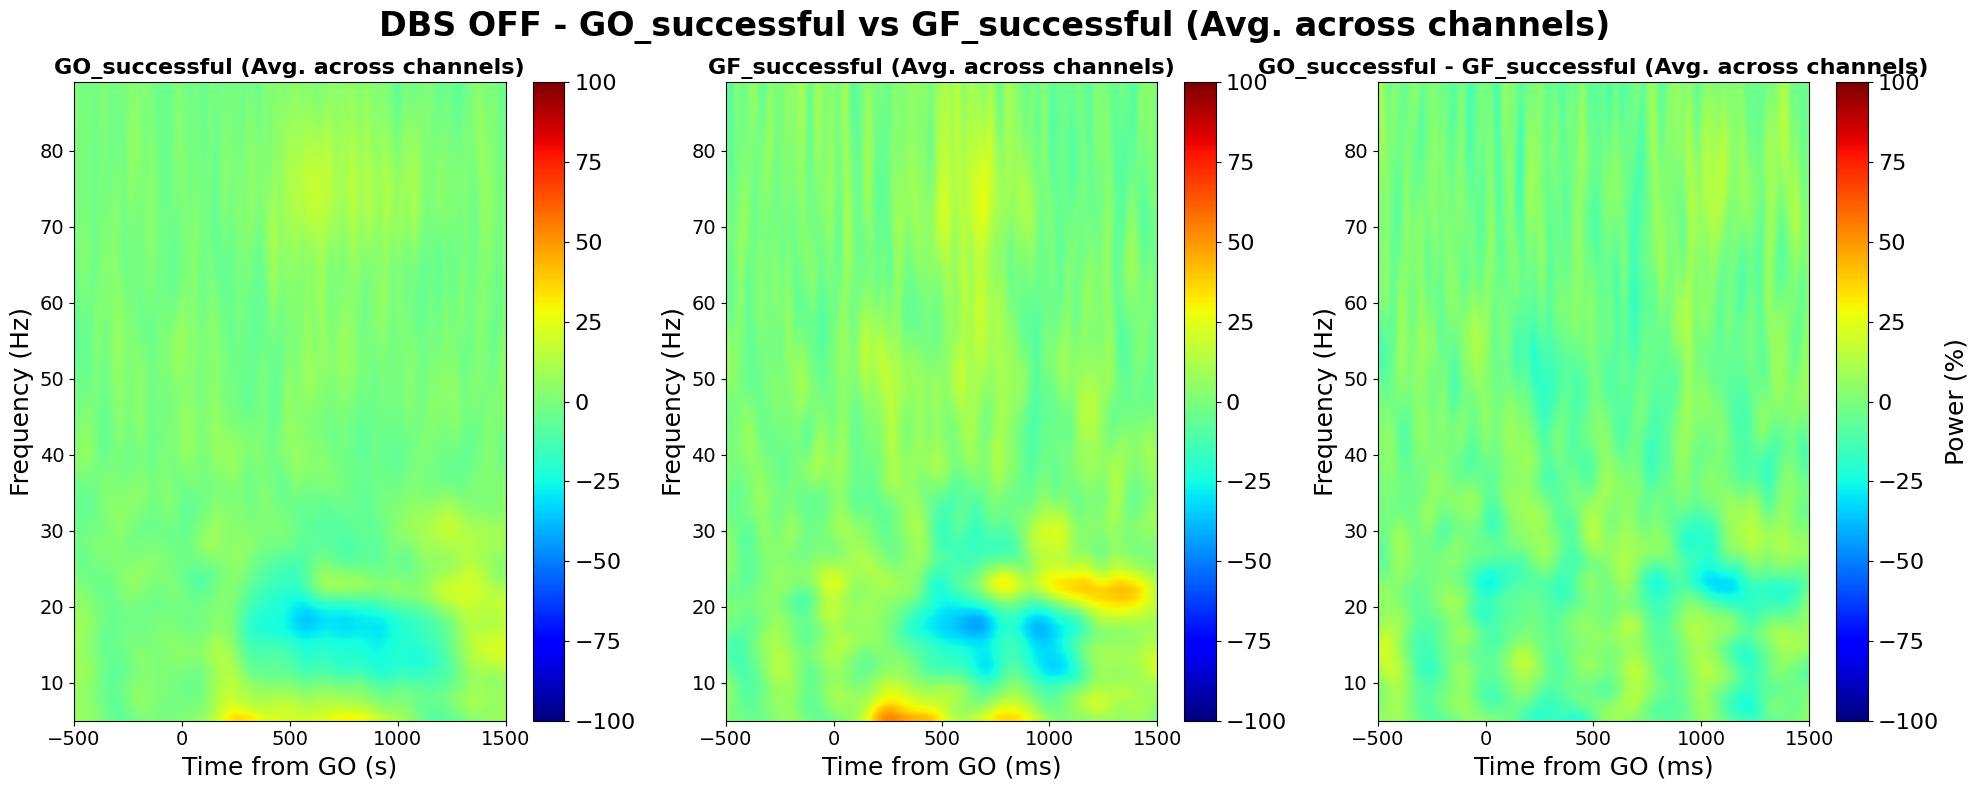

In [50]:
plot_power_comparison_between_2_conditions_all_ch(
    ["Left_STN", "Right_STN"], epochs_by_condition, "DBS OFF", "GO_successful", 
    "GF_successful", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )

Using a threshold of 2.200985
stat_fun(H1): min=-5.5385738545834755 max=4.706484485004491
Running initial clustering …
Found 43 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

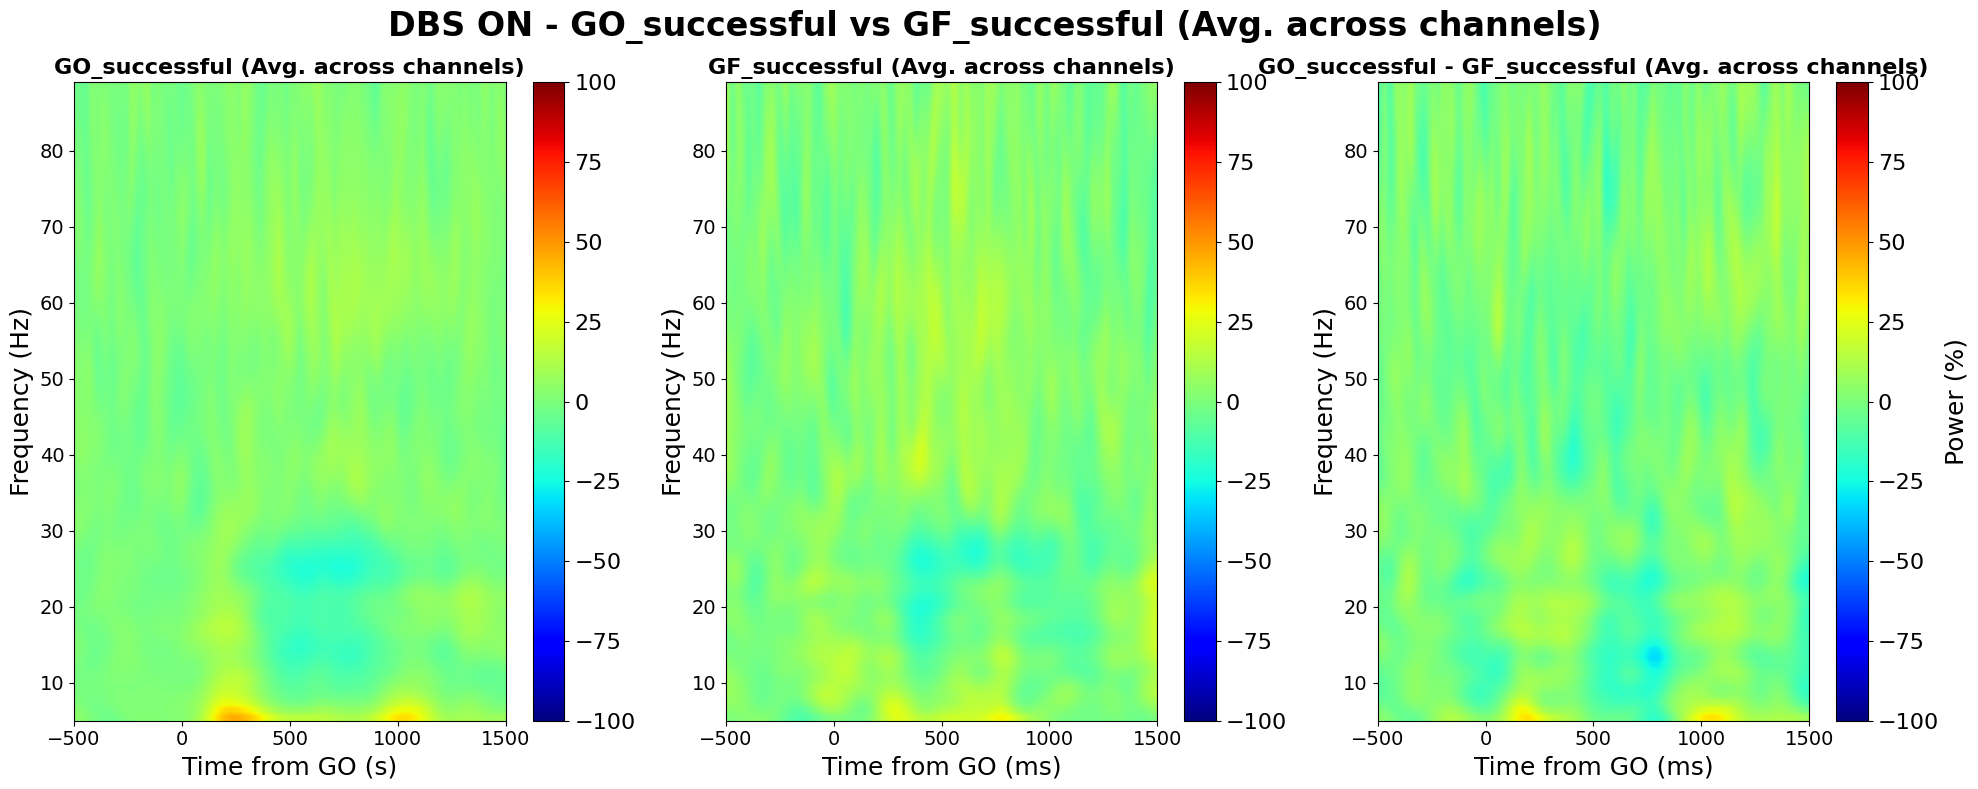

In [52]:
plot_power_comparison_between_2_conditions_all_ch(
    ["Left_STN", "Right_STN"], epochs_by_condition, "DBS ON", "GO_successful", 
    "GF_successful", (0,1), 
    'GO signal', saving_path, fmax=90, vmin=-100, vmax=100
    )